# Data Analysis & Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


from scipy.stats import f_oneway
import numpy as np

### Carga de dataset

In [2]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15, 8))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=50,ax=ax, facecolor='midnightblue', edgecolor='black')
        title_obj = ax.set_title(var_name+" Distribution")
        plt.setp(title_obj, color='black')                     # Individual title colours.

        # remove grid lines
        ax.grid(False)

        ax.xaxis.label.set_color('black')  
        ax.yaxis.label.set_color('black')          
        ax.tick_params(axis='x', colors='black')       #set the color of xticks
        ax.tick_params(axis='y', colors='black')       #set the color of yticks
        
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

In [3]:
df_full = pd.read_csv("data/fact_application_full.csv")
# df_full

In [4]:
# Se tiene el df con todos los campos disponibles --> 912 aplicaciones
# Seleccionamos solo las aplicaciones que tienen recursos en pdn
df_full_pdn = df_full[df_full['pdnresourcescount'] > 0]
len(df_full_pdn)

682

In [53]:
# Eliminamos las características asociadas a los conteos pues solo vamos a usar la característica con el log
features_a_eliminar = ['provider_id', 'snapshot_date_id',  'applicationcode',  'fullresourcescount',
                       'devresourcescount', 'qaresourcescount', 'pdnresourcescount', 'fullaccountscount',
                       'devaccountscount', 'qaaccountscount', 'pdnaccountscount', 'organization_id',
                       'ppn_tm', 'clasification'
                      ]
df_pdn = df_full_pdn.drop(features_a_eliminar, axis=1)


# Eliminamos application_id ya que es un identificador y no una característica que se deba incluir en el análisis
df_pdn = df_pdn.drop('application_id', axis=1)

features = df_pdn.columns.to_list()
len(features)

25

In [54]:
df_pdn.columns

Index(['redsecuritycheckscount', 'redsecurityresourcescount',
       'yellowsecuritycheckscount', 'yellowsecurityresourcescount',
       'redfaulttolerancecheckscount', 'redfaulttoleranceresourcescount',
       'yellowfaulttolerancecheckscount', 'yellowfaulttoleranceresourcescount',
       'redperformancecheckscount', 'redperformanceresourcescount',
       'yellowperformancecheckscount', 'yellowperformanceresourcescount',
       'redcostoptimizingcheckscount', 'redcostoptimizingresourcescount',
       'yellowcostoptimizingcheckscount', 'yellowcostoptimizingresourcescount',
       'redsecuritydensity', 'yellowsecuritydensity',
       'redfaulttolerancedensity', 'yellowfaulttolerancedensity',
       'redperformancedensity', 'yellowperformancedensity',
       'redcostoptimizingdensity', 'yellowcostoptimizingdensity',
       'pdnresourcessize'],
      dtype='object')

### Vamos a aplicar PCA a nuestro DF

#### Preprocesamiento


In [7]:
# Estandarización
scaler = StandardScaler()
df_pdn_scaled = scaler.fit_transform(df_pdn)
df_pdn_scaled = pd.DataFrame(df_pdn_scaled, columns=features)

In [8]:
df_pdn_scaled.shape

(682, 25)

In [9]:
# Aplicamos PCA
pca = PCA(n_components=10) # Especifica el número de componentes principales a retener
#pca = PCA(n_components=10, svd_solver="auto", tol=1e-3, random_state= 17, iterated_power="auto") # Especifica el número de componentes principales a retener
# da los mismos resultados que pca = PCA(n_components=10)

principal_componets = pca.fit_transform(df_pdn_scaled)

print(f"Tipo df_pdn_scaled: {type(df_pdn_scaled)}")
print(f"Tipo principal_componets: {type(principal_componets)}")

Tipo df_pdn_scaled: <class 'pandas.core.frame.DataFrame'>
Tipo principal_componets: <class 'numpy.ndarray'>


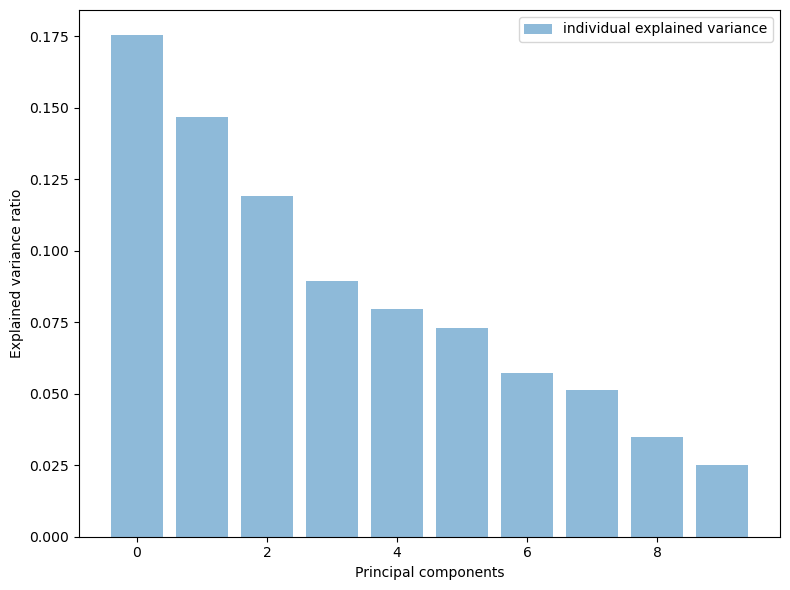

In [11]:
# Ahora, principal_components contiene las componentes principales
# Usamos la varianza explicada para determinar cuantos componentes retener

variance_ratio = pca.explained_variance_ratio_

# plot the explained variance using a barplot
plt.figure(figsize=(8, 6))
plt.bar(range(10), variance_ratio, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Ahora usando unicamente las variables originales de conteo, se dejan a un lado aquellas de densidad.

In [12]:
df_pdn_scaled = df_pdn_scaled.filter(regex='^(?!.*density).*$')
# quedan 17 columnas

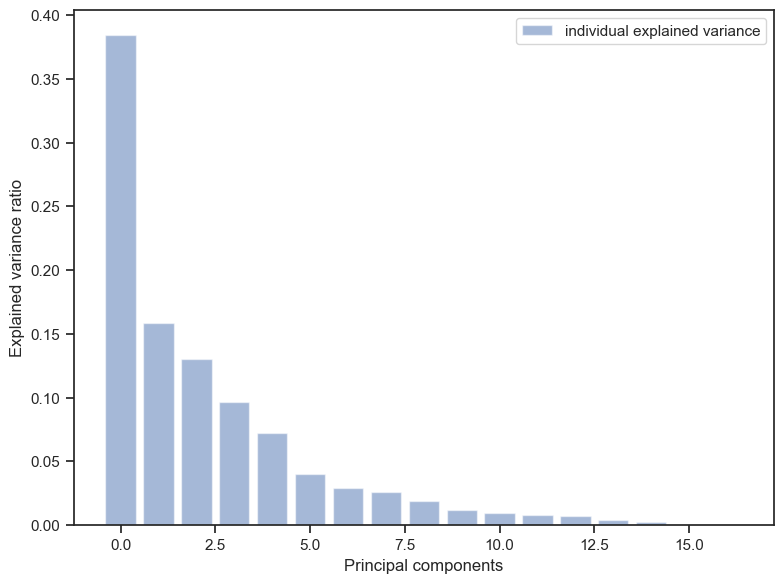

In [67]:
# volvemos a aplicar pca a este espacio de características
pca = PCA(n_components=df_pdn_scaled.shape[1])
principal_componets = pca.fit_transform(df_pdn_scaled)

variance_ratio = pca.explained_variance_ratio_

# plot the explained variance using a barplot
plt.figure(figsize=(8, 6))
plt.bar(range(df_pdn_scaled.shape[1]), variance_ratio, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

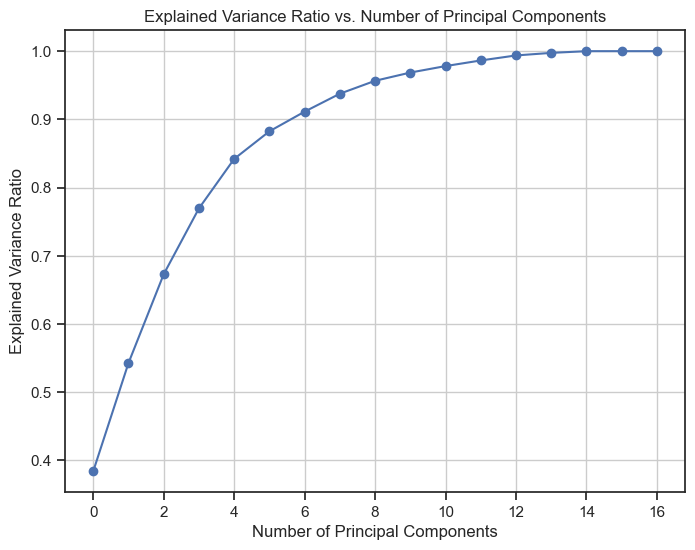

In [68]:
# plot pca
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()


In [22]:
Importancia_Componentes.loc[:,0:12]

0         1         2         3         4         5         6   \
0  0.241538  0.180369  0.118865  0.084533  0.076756  0.068563  0.052688   

         7         8         9        10        11        12  
0  0.034253  0.032967  0.023557  0.02209  0.020767  0.019239

In [70]:
Importancia_Componentes = pd.DataFrame(pca.explained_variance_ratio_)
Importancia_Componentes = Importancia_Componentes.T
print("Porcentaje de Varianza detectada para las primeras 1 componentes: ", format(100*Importancia_Componentes.loc[:,0:0].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 2 componentes: ", format(100*Importancia_Componentes.loc[:,0:1].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 3 componentes: ", format(100*Importancia_Componentes.loc[:,0:2].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 4 componentes: ", format(100*Importancia_Componentes.loc[:,0:3].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 5 componentes: ", format(100*Importancia_Componentes.loc[:,0:4].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 6 componentes: ", format(100*Importancia_Componentes.loc[:,0:5].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 7 componentes: ", format(100*Importancia_Componentes.loc[:,0:6].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 8 componentes: ", format(100*Importancia_Componentes.loc[:,0:7].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 9 componentes: ", format(100*Importancia_Componentes.loc[:,0:8].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 10 componentes: ", format(100*Importancia_Componentes.loc[:,0:9].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 11 componentes: ", format(100*Importancia_Componentes.loc[:,0:10].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 12 componentes: ", format(100*Importancia_Componentes.loc[:,0:11].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 13 componentes: ", format(100*Importancia_Componentes.loc[:,0:12].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 14 componentes: ", format(100*Importancia_Componentes.loc[:,0:13].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 15 componentes: ", format(100*Importancia_Componentes.loc[:,0:14].sum(axis = 1).values))

Porcentaje de Varianza detectada para las primeras 1 componentes:  [38.43169911]
Porcentaje de Varianza detectada para las primeras 2 componentes:  [54.28547141]
Porcentaje de Varianza detectada para las primeras 3 componentes:  [67.30375669]
Porcentaje de Varianza detectada para las primeras 4 componentes:  [76.95322841]
Porcentaje de Varianza detectada para las primeras 5 componentes:  [84.20492315]
Porcentaje de Varianza detectada para las primeras 6 componentes:  [88.25129828]
Porcentaje de Varianza detectada para las primeras 7 componentes:  [91.13530386]
Porcentaje de Varianza detectada para las primeras 8 componentes:  [93.76554049]
Porcentaje de Varianza detectada para las primeras 9 componentes:  [95.65686291]
Porcentaje de Varianza detectada para las primeras 10 componentes:  [96.86422987]
Porcentaje de Varianza detectada para las primeras 11 componentes:  [97.81448459]
Porcentaje de Varianza detectada para las primeras 12 componentes:  [98.63835783]
Porcentaje de Varianza de

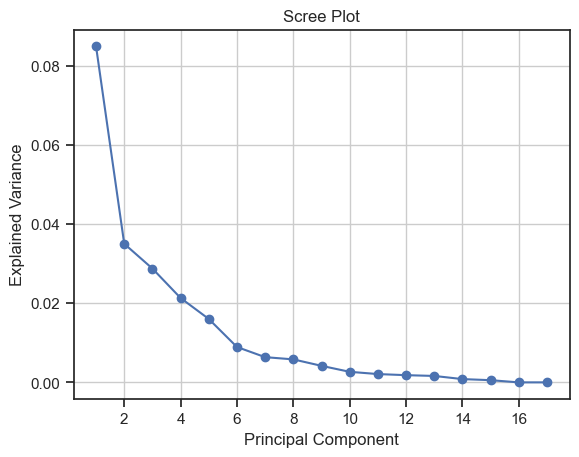

In [71]:
# veamos otras maneras de analizar este pca, para ver si es el correcto
explained_variance = pca.explained_variance_
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

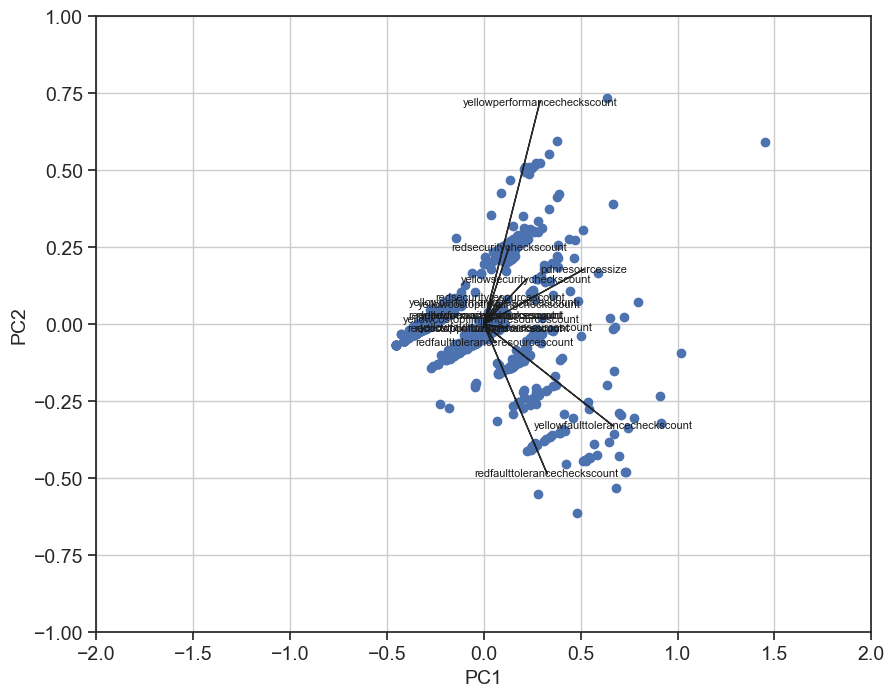

In [81]:
# plot a biplot using the first two principal components
# https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot
def biplot(score, coeff ):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    colors = ['g','r','y']
    markers=['o','^','x']
    plt.scatter(xs,ys,) # color based on group
    multiplier=1
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        if i % 2 != 0:
            plt.arrow(0, 0, coeff[i,0]*multiplier, coeff[i,1]*multiplier, color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1, overhang=0.2)
            plt.text(coeff[i,0]* multiplier, coeff[i,1] * multiplier, df_pdn_scaled.columns[i], color = 'k', ha = 'center', va = 'center',fontsize=8)
        else:
            plt.arrow(0, 0, coeff[i,0]*multiplier, coeff[i,1]*multiplier, color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1, overhang=0.2)
            plt.text(coeff[i,0]* multiplier  , coeff[i,1] * multiplier, df_pdn_scaled.columns[i], color = 'k', ha = 'center', va = 'center',fontsize=8)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    #limx=20
    #limy=20
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

biplot(principal_componets, np.transpose(pca.components_[0:2, :]))

Este diagrama muestra los pesos de las caracteristicas originales en las componentes principales pc1 y pc2. También la flecha sirve para indicar si hay correlación entre las variables.

### Implementación de PCA
Hasta aquí podriamos seleccionar 9 o 11 componentes principales y representar una buena porción de la varianza de la información del espacio original.

In [189]:
# remove density features
features = features[:16] + features[-1:]

In [190]:
# normalicemos nuevamente los datos
minmax = MinMaxScaler()
df_pdn_scaled = minmax.fit_transform(df_pdn[features])

df_pdn_scaled = pd.DataFrame(df_pdn_scaled, columns=features)

df_pdn_scaled.describe()

redsecuritycheckscount  redsecurityresourcescount  \
count              682.000000                 682.000000   
mean                 0.075432                   0.020868   
std                  0.095841                   0.070930   
min                  0.000000                   0.000000   
25%                  0.000000                   0.000000   
50%                  0.000000                   0.000000   
75%                  0.111111                   0.014493   
max                  1.000000                   1.000000   

       yellowsecuritycheckscount  yellowsecurityresourcescount  \
count                 682.000000                    682.000000   
mean                    0.104175                      0.006122   
std                     0.089096                      0.041431   
min                     0.000000                      0.000000   
25%                     0.047619                      0.000740   
50%                     0.095238                      0.002219   
75%                     0.142857                      0.004438   
max                     1.000000                      1.000000   

       redfaulttolerancecheckscount  redfaulttoleranceresourcescount  \
count                    682.000000                       682.000000   
mean                       0.063783                         0.008008   
std                        0.179637                         0.055277   
min                        0.000000                         0.000000   
25%                        0.000000                         0.000000   
50%                        0.000000                         0.000000   
75%                        0.000000                         0.000000   
max                        1.000000                         1.000000   

       yellowfaulttolerancecheckscount  yellowfaulttoleranceresourcescount  \
count                       682.000000                          682.000000   
mean                          0.241569                            0.027466   
std                           0.224717                            0.070427   
min                           0.000000                            0.000000   
25%                           0.000000                            0.000000   
50%                           0.250000                            0.018519   
75%                           0.250000                            0.027778   
max                           1.000000                            1.000000   

       redperformancecheckscount  redperformanceresourcescount  \
count                 682.000000                    682.000000   
mean                    0.002933                      0.002933   
std                     0.054113                      0.054113   
min                     0.000000                      0.000000   
25%                     0.000000                      0.000000   
50%                     0.000000                      0.000000   
75%                     0.000000                      0.000000   
max                     1.000000                      1.000000   

       yellowperformancecheckscount  yellowperformanceresourcescount  \
count                    682.000000                       682.000000   
mean                       0.096774                         0.011694   
std                        0.178149                         0.046891   
min                        0.000000                         0.000000   
25%                        0.000000                         0.000000   
50%                        0.000000                         0.000000   
75%                        0.333333                         0.025000   
max                        1.000000                         1.000000   

       redcostoptimizingcheckscount  redcostoptimizingresourcescount  \
count                    682.000000                       682.000000   
mean                       0.002933                         0.002933   
std                        0.054113                        

In [191]:
# aplicar pca con la varianza obtenida anteriormente
selected_components = 9 # 95%

explained_variance_rate = np.sum(pca.explained_variance_ratio_[0:selected_components])

final_pca = PCA(explained_variance_rate)

principal_componets = final_pca.fit_transform(df_pdn_scaled)

print(f"Tamaño de los datos originales: {df_pdn_scaled.shape}")
print(f"Tamaño de los datos reducidos: {principal_componets.shape}")
print(f"Porcentaje de varianza explicada con las componentes seleccionadas {explained_variance_rate:.2%}")

Tamaño de los datos originales: (682, 17)
Tamaño de los datos reducidos: (682, 9)
Porcentaje de varianza explicada con las componentes seleccionadas 95.66%


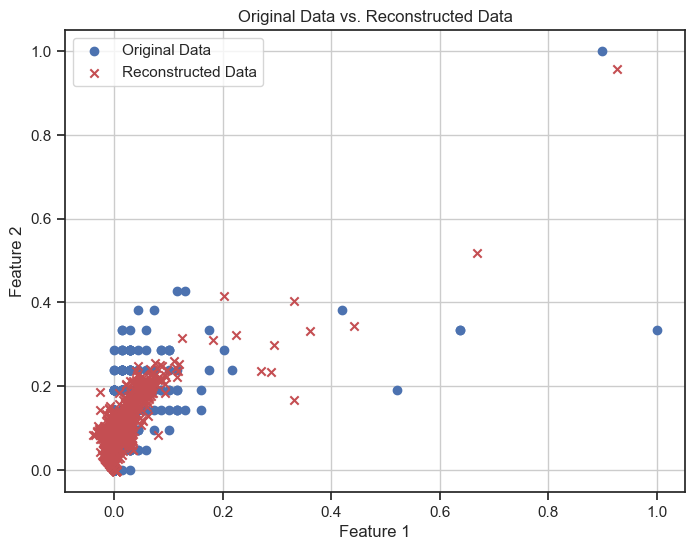

In [89]:
# reconstruction plot
reconstructed_data = final_pca.inverse_transform(principal_componets)

# Create a scatter plot of the original and reconstructed data
plt.figure(figsize=(8, 6))
plt.scatter(df_pdn_scaled.iloc[:, 1], df_pdn_scaled.iloc[:, 2], label='Original Data', marker='o', color='b')
plt.scatter(reconstructed_data[:, 1], reconstructed_data[:, 2], label='Reconstructed Data', marker='x', color='r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data vs. Reconstructed Data')
plt.legend()
plt.grid(True)
plt.show()


En la gráfica se puede observar una reconstrucción del dataset original usando las dos primeras componentes principales. Esto se realiza solo para dos componentes principales y la relación con las características originales.

In [90]:
# convert array resulting of pca in dataframe with name of principal components
columns = [f"PC{i}" for i in range(1, principal_componets.shape[1] + 1)]
df_pca = pd.DataFrame(principal_componets, columns=columns)

array([[<Axes: xlabel='PC1', ylabel='PC1'>,
        <Axes: xlabel='PC2', ylabel='PC1'>,
        <Axes: xlabel='PC3', ylabel='PC1'>,
        <Axes: xlabel='PC4', ylabel='PC1'>,
        <Axes: xlabel='PC5', ylabel='PC1'>,
        <Axes: xlabel='PC6', ylabel='PC1'>,
        <Axes: xlabel='PC7', ylabel='PC1'>,
        <Axes: xlabel='PC8', ylabel='PC1'>,
        <Axes: xlabel='PC9', ylabel='PC1'>],
       [<Axes: xlabel='PC1', ylabel='PC2'>,
        <Axes: xlabel='PC2', ylabel='PC2'>,
        <Axes: xlabel='PC3', ylabel='PC2'>,
        <Axes: xlabel='PC4', ylabel='PC2'>,
        <Axes: xlabel='PC5', ylabel='PC2'>,
        <Axes: xlabel='PC6', ylabel='PC2'>,
        <Axes: xlabel='PC7', ylabel='PC2'>,
        <Axes: xlabel='PC8', ylabel='PC2'>,
        <Axes: xlabel='PC9', ylabel='PC2'>],
       [<Axes: xlabel='PC1', ylabel='PC3'>,
        <Axes: xlabel='PC2', ylabel='PC3'>,
        <Axes: xlabel='PC3', ylabel='PC3'>,
        <Axes: xlabel='PC4', ylabel='PC3'>,
        <Axes: xlabel='PC5', y

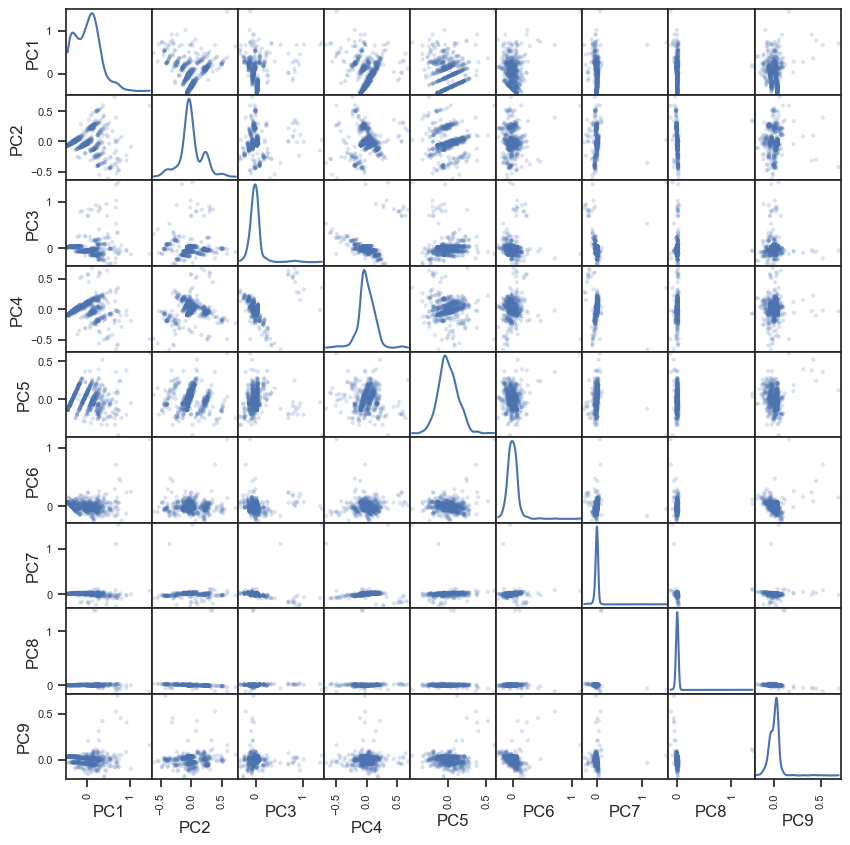

In [91]:
# plot scatter matrix using seaborn
scatter_matrix(df_pca, alpha=0.2, figsize=(10, 10), diagonal='kde')

Ahora con las caracteristicas de densidad

In [163]:
# con densidad hacer el pca
df_pdn.filter(regex='^(?=.*density|pdnresourcessize).*$').columns

Index(['redsecuritydensity', 'yellowsecuritydensity',
       'redfaulttolerancedensity', 'yellowfaulttolerancedensity',
       'redperformancedensity', 'yellowperformancedensity',
       'redcostoptimizingdensity', 'yellowcostoptimizingdensity',
       'pdnresourcessize'],
      dtype='object')

In [165]:
# normalicemos nuevamente los datos
df_density = df_pdn.filter(regex='^(?=.*density|pdnresourcessize).*$')

minmax = MinMaxScaler()
df_den_scaled = minmax.fit_transform(df_density)

df_den_scaled = pd.DataFrame(df_den_scaled, columns=df_density.columns)

df_den_scaled.describe()

redsecuritydensity  yellowsecuritydensity  redfaulttolerancedensity  \
count          682.000000             682.000000                682.000000   
mean             0.029092               0.092755                  0.010525   
std              0.085278               0.137911                  0.061693   
min              0.000000               0.000000                  0.000000   
25%              0.000000               0.013000                  0.000000   
50%              0.000000               0.049000                  0.000000   
75%              0.022000               0.106750                  0.000000   
max              1.000000               1.000000                  1.000000   

       yellowfaulttolerancedensity  redperformancedensity  \
count                   682.000000             682.000000   
mean                      0.046635               0.002639   
std                       0.092862               0.049003   
min                       0.000000               0.000000   
25%                       0.000000               0.000000   
50%                       0.019000               0.000000   
75%                       0.050000               0.000000   
max                       1.000000               1.000000   

       yellowperformancedensity  redcostoptimizingdensity  \
count                682.000000                682.000000   
mean                   0.022205                  0.001733   
std                    0.074714                  0.038910   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.003000                  0.000000   
max                    1.000000                  1.000000   

       yellowcostoptimizingdensity  pdnresourcessize  
count                   682.000000        682.000000  
mean                      0.008533          0.391210  
std                       0.070185          0.184351  
min                       0.000000          0.000000  
25%                       0.000000          0.271652  
50%                       0.000000          0.438066  
75%                       0.000000          0.512588  
max                       1.000000          1.000000

In [193]:
# aplicar pca con la varianza obtenida anteriormente
den_pca = PCA(n_components=df_den_scaled.shape[1])

principal_components = den_pca.fit_transform(df_den_scaled)

print(f"Tamaño de los datos originales: {df_den_scaled.shape}")
print(f"Tamaño de los datos reducidos: {principal_components.shape}")

Tamaño de los datos originales: (682, 9)
Tamaño de los datos reducidos: (682, 9)


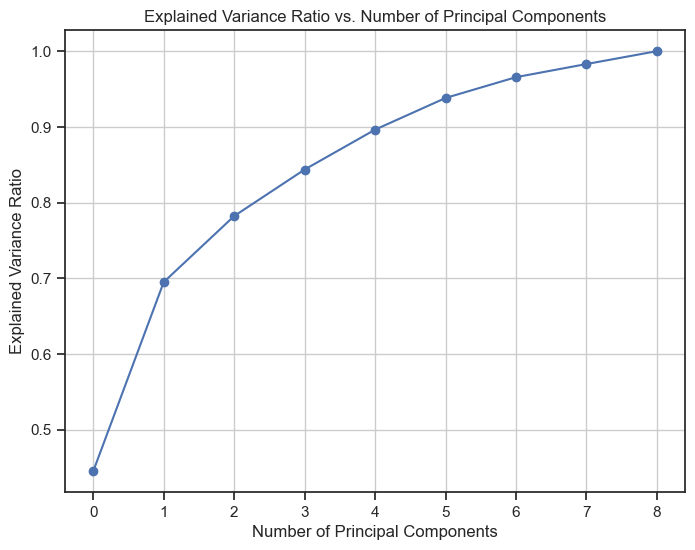

In [195]:
# plot pca
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(den_pca.explained_variance_ratio_), marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

In [216]:
Importancia_Componentes.loc[:,0:7]

0         1        2         3        4         5         6  \
0  0.445253  0.249742  0.08722  0.061448  0.05267  0.041841  0.027475   

          7  
0  0.017353

In [182]:
Importancia_Componentes = pd.DataFrame(den_pca.explained_variance_ratio_)
Importancia_Componentes = Importancia_Componentes.T
print("Porcentaje de Varianza detectada para las primeras 1 componentes: ", format(100*Importancia_Componentes.loc[:,0:0].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 2 componentes: ", format(100*Importancia_Componentes.loc[:,0:1].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 3 componentes: ", format(100*Importancia_Componentes.loc[:,0:2].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 4 componentes: ", format(100*Importancia_Componentes.loc[:,0:3].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 5 componentes: ", format(100*Importancia_Componentes.loc[:,0:4].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 6 componentes: ", format(100*Importancia_Componentes.loc[:,0:5].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 7 componentes: ", format(100*Importancia_Componentes.loc[:,0:6].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 8 componentes: ", format(100*Importancia_Componentes.loc[:,0:7].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 9 componentes: ", format(100*Importancia_Componentes.loc[:,0:8].sum(axis = 1).values))

Porcentaje de Varianza detectada para las primeras 1 componentes:  [44.52528887]
Porcentaje de Varianza detectada para las primeras 2 componentes:  [69.49950543]
Porcentaje de Varianza detectada para las primeras 3 componentes:  [78.22154457]
Porcentaje de Varianza detectada para las primeras 4 componentes:  [84.36635154]
Porcentaje de Varianza detectada para las primeras 5 componentes:  [89.63331971]
Porcentaje de Varianza detectada para las primeras 6 componentes:  [93.81746574]
Porcentaje de Varianza detectada para las primeras 7 componentes:  [96.56492775]
Porcentaje de Varianza detectada para las primeras 8 componentes:  [98.30020841]
Porcentaje de Varianza detectada para las primeras 9 componentes:  [100.]


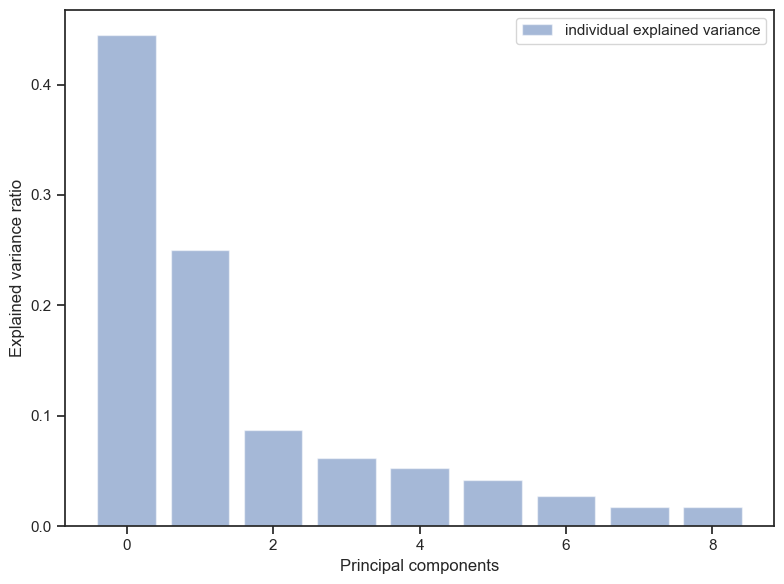

In [172]:
# plot the explained variance using a barplot
plt.figure(figsize=(8, 6))
variance_ratio = den_pca.explained_variance_ratio_
plt.bar(range(df_den_scaled.shape[1]), variance_ratio, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Se podría pasar de 9 caracteristicas a 7, con una varianza acumulada de 96%.

In [184]:
np.sum(den_pca.explained_variance_ratio_[0:7])

0.9656492774742347

In [206]:
df_den_scaled

redsecuritydensity  yellowsecuritydensity  redfaulttolerancedensity  \
0                 0.429                  0.429                     0.000   
1                 0.333                  0.333                     0.000   
2                 0.333                  0.667                     0.000   
3                 0.333                  0.333                     0.000   
4                 0.093                  0.344                     0.742   
..                  ...                    ...                       ...   
677               0.000                  0.000                     0.000   
678               0.000                  0.000                     0.000   
679               0.000                  0.000                     0.000   
680               0.000                  0.000                     0.000   
681               0.000                  0.000                     0.000   

     yellowfaulttolerancedensity  redperformancedensity  \
0                          0.000                    0.0   
1                          0.333                    0.0   
2                          0.333                    0.0   
3                          0.000                    0.0   
4                          0.007                    0.0   
..                           ...                    ...   
677                        0.000                    0.0   
678                        0.000                    0.0   
679                        0.000                    0.0   
680                        0.000                    0.0   
681                        0.000                    0.0   

     yellowperformancedensity  redcostoptimizingdensity  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
..                        ...                       ...   
677                       0.0                       0.0   
678                       0.0                       0.0   
679                       0.0                       0.0   
680                       0.0                       0.0   
681                       0.0                       0.0   

     yellowcostoptimizingdensity  pdnresourcessize  
0                            0.0          0.212739  
1                            0.0          0.120091  
2                            0.0          0.195871  
3                            0.0          0.120091  
4                            0.0          0.548590  
..                           ...               ...  
677                          0.0          0.000000  
678                          0.0          0.075780  
679                          0.0          0.075780  
680                          0.0          0.075780  
681                          0.0          0.075780  

[682 rows x 9 columns]

In [214]:
len(den_pca.explained_variance_ratio_[0:8])

8

In [218]:
components_selected = 7 # 95%


den_pca1 = PCA(n_components=components_selected)

principal_componets = den_pca1.fit_transform(df_den_scaled)

print(f"Tamaño de los datos originales: {df_den_scaled.shape}")
print(f"Tamaño de los datos reducidos: {principal_componets.shape}")
explained_variance_rate = np.sum(den_pca1.explained_variance_ratio_[0:components_selected])
print(f"Porcentaje de varianza explicada con las componentes seleccionadas {explained_variance_rate:.2%}")

Tamaño de los datos originales: (682, 9)
Tamaño de los datos reducidos: (682, 7)
Porcentaje de varianza explicada con las componentes seleccionadas 96.56%


In [220]:
# convert array resulting of pca in dataframe with name of principal components
columns = [f"PC{i}" for i in range(1, principal_componets.shape[1] + 1)]
df_den_pca = pd.DataFrame(principal_componets, columns=columns)

array([[<Axes: xlabel='PC1', ylabel='PC1'>,
        <Axes: xlabel='PC2', ylabel='PC1'>,
        <Axes: xlabel='PC3', ylabel='PC1'>,
        <Axes: xlabel='PC4', ylabel='PC1'>,
        <Axes: xlabel='PC5', ylabel='PC1'>,
        <Axes: xlabel='PC6', ylabel='PC1'>,
        <Axes: xlabel='PC7', ylabel='PC1'>],
       [<Axes: xlabel='PC1', ylabel='PC2'>,
        <Axes: xlabel='PC2', ylabel='PC2'>,
        <Axes: xlabel='PC3', ylabel='PC2'>,
        <Axes: xlabel='PC4', ylabel='PC2'>,
        <Axes: xlabel='PC5', ylabel='PC2'>,
        <Axes: xlabel='PC6', ylabel='PC2'>,
        <Axes: xlabel='PC7', ylabel='PC2'>],
       [<Axes: xlabel='PC1', ylabel='PC3'>,
        <Axes: xlabel='PC2', ylabel='PC3'>,
        <Axes: xlabel='PC3', ylabel='PC3'>,
        <Axes: xlabel='PC4', ylabel='PC3'>,
        <Axes: xlabel='PC5', ylabel='PC3'>,
        <Axes: xlabel='PC6', ylabel='PC3'>,
        <Axes: xlabel='PC7', ylabel='PC3'>],
       [<Axes: xlabel='PC1', ylabel='PC4'>,
        <Axes: xlabel='PC2', 

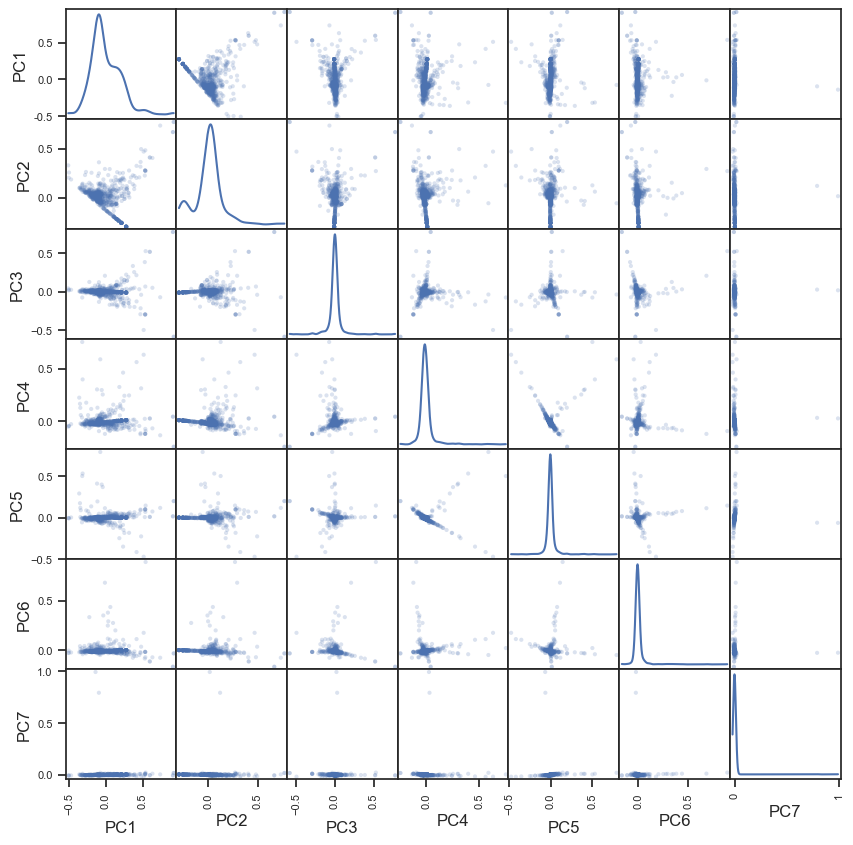

In [225]:
# plot scatter matrix using seaborn
scatter_matrix(df_den_pca, alpha=0.2, figsize=(10, 10), diagonal='kde')

#### K Means con PCA
Ahora vamos a realizar una clusterización con kmeans con las variables de pca.. para ver que agrupaciones puede encontrar en este nuevo espacio

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 2, the average silhouette_score is : 0.4411900994766181


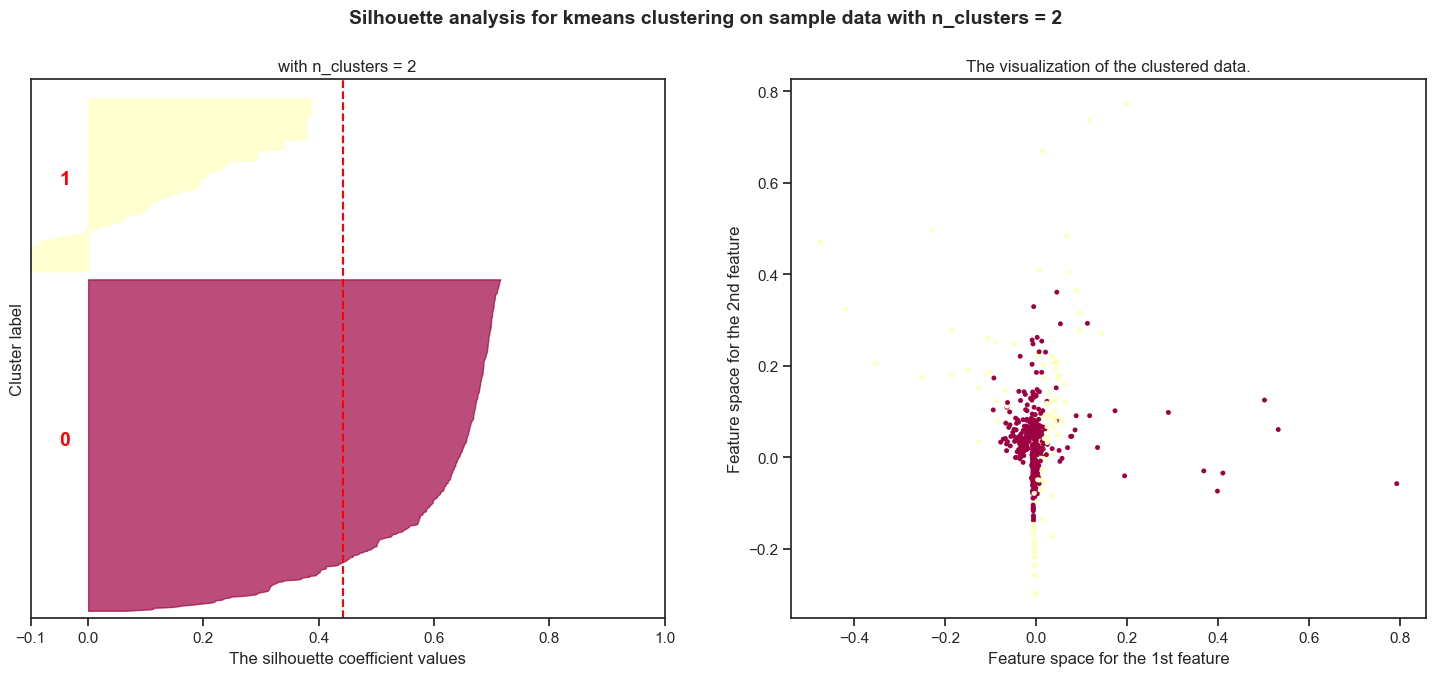

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 3, the average silhouette_score is : 0.4531550522452359


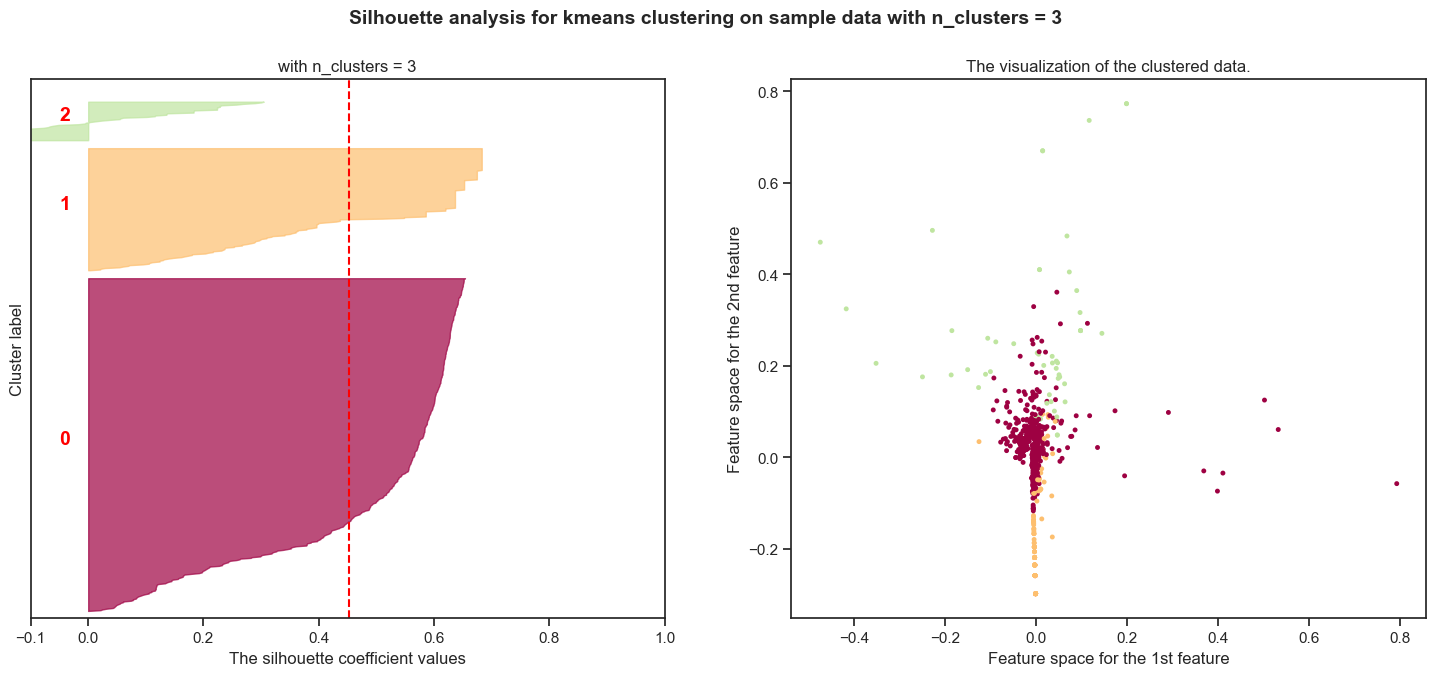

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 4, the average silhouette_score is : 0.43616842639046316


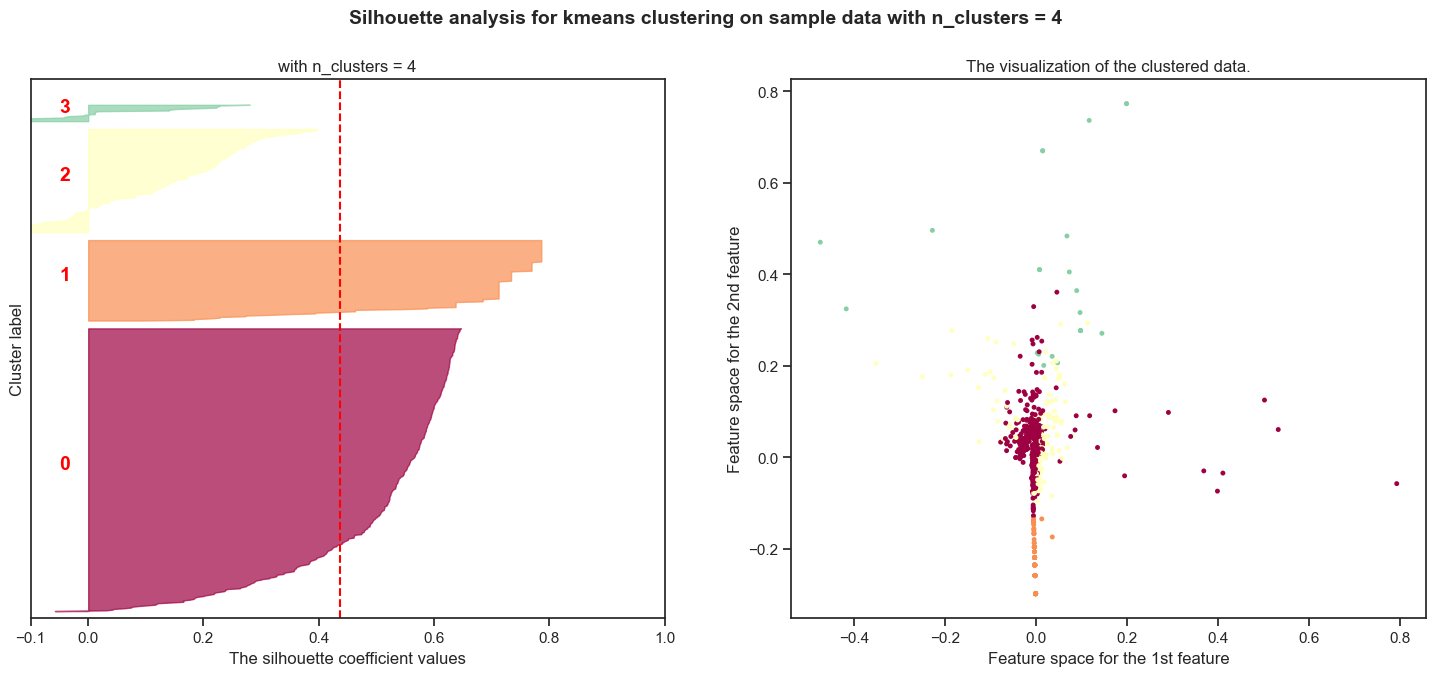

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 5, the average silhouette_score is : 0.4566596772767696


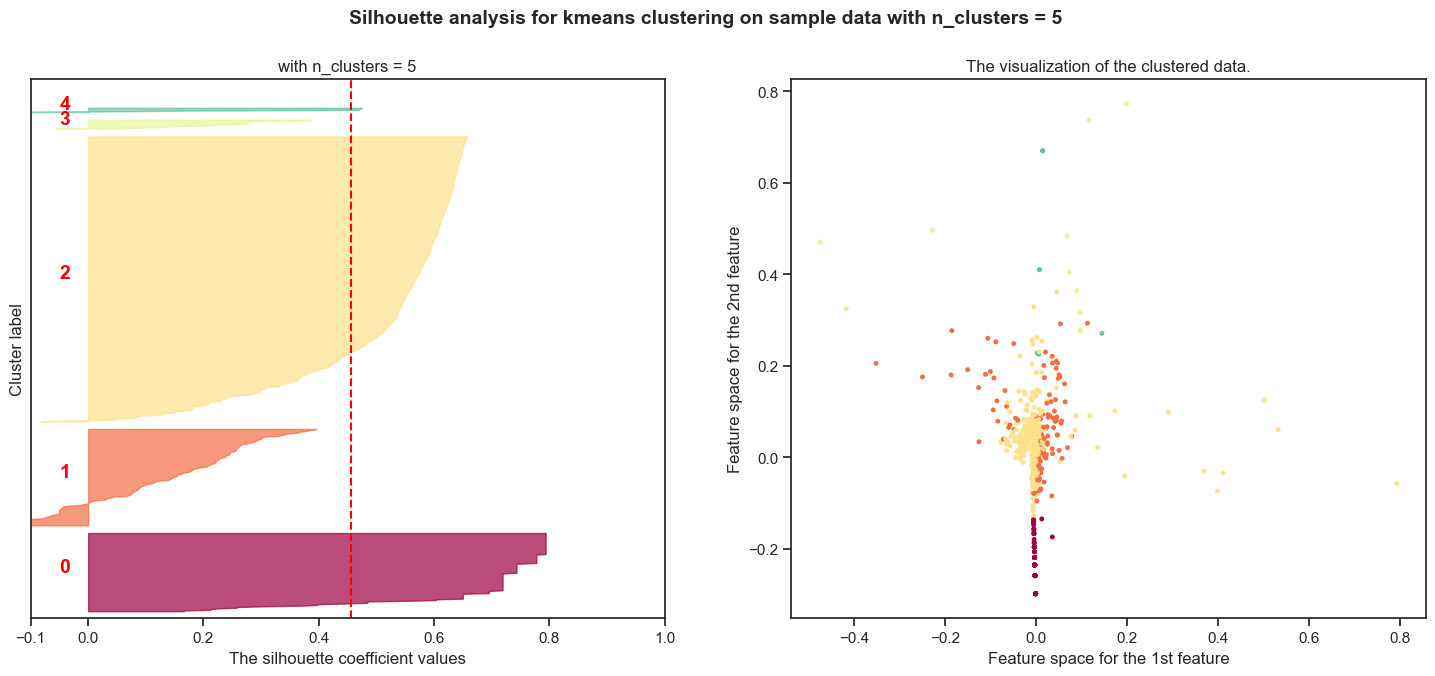

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 6, the average silhouette_score is : 0.47259189097229853


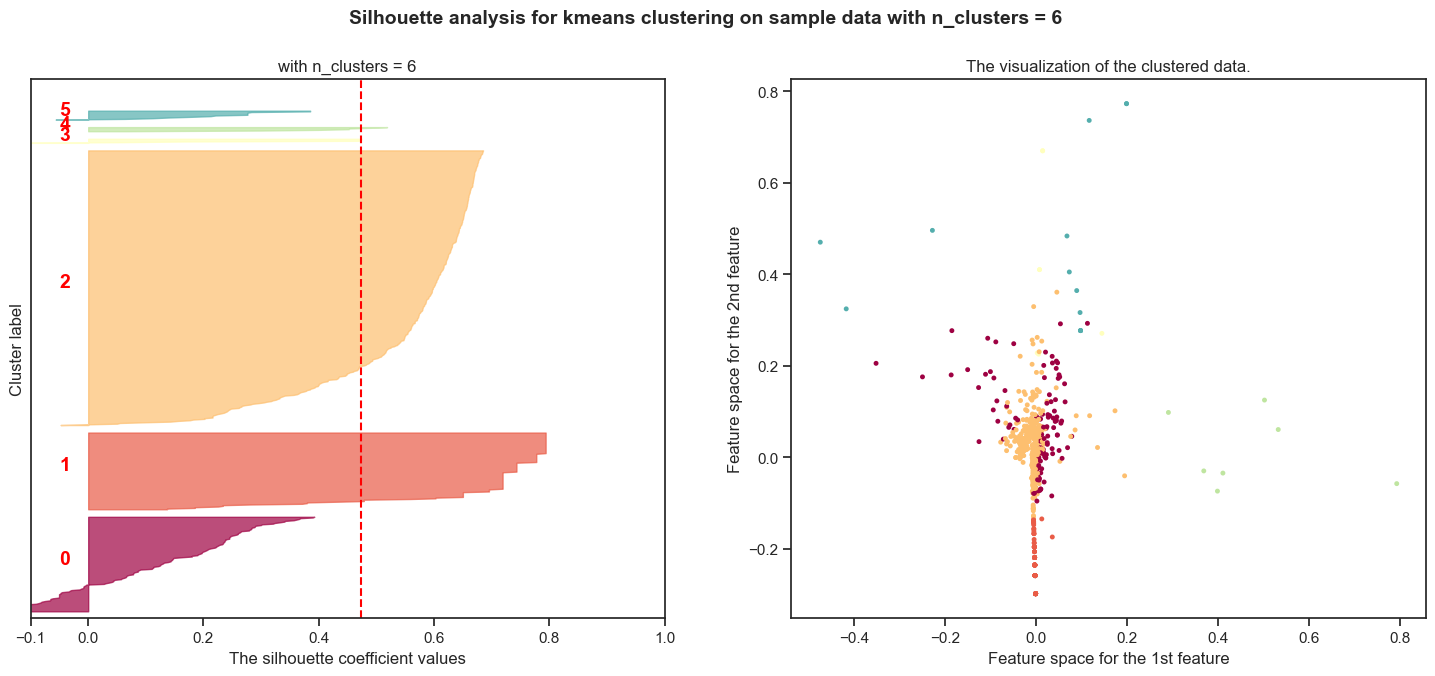

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 7, the average silhouette_score is : 0.3507377338545075


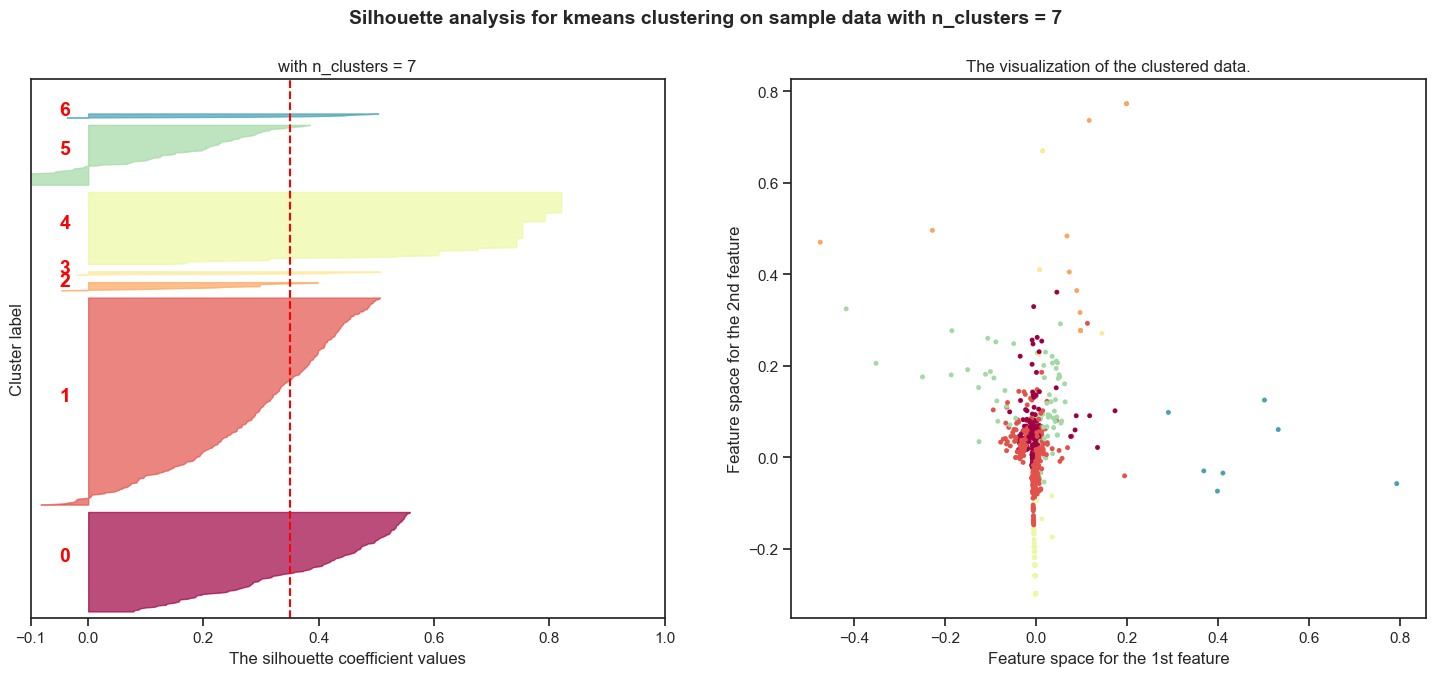

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 8, the average silhouette_score is : 0.3676724921259979


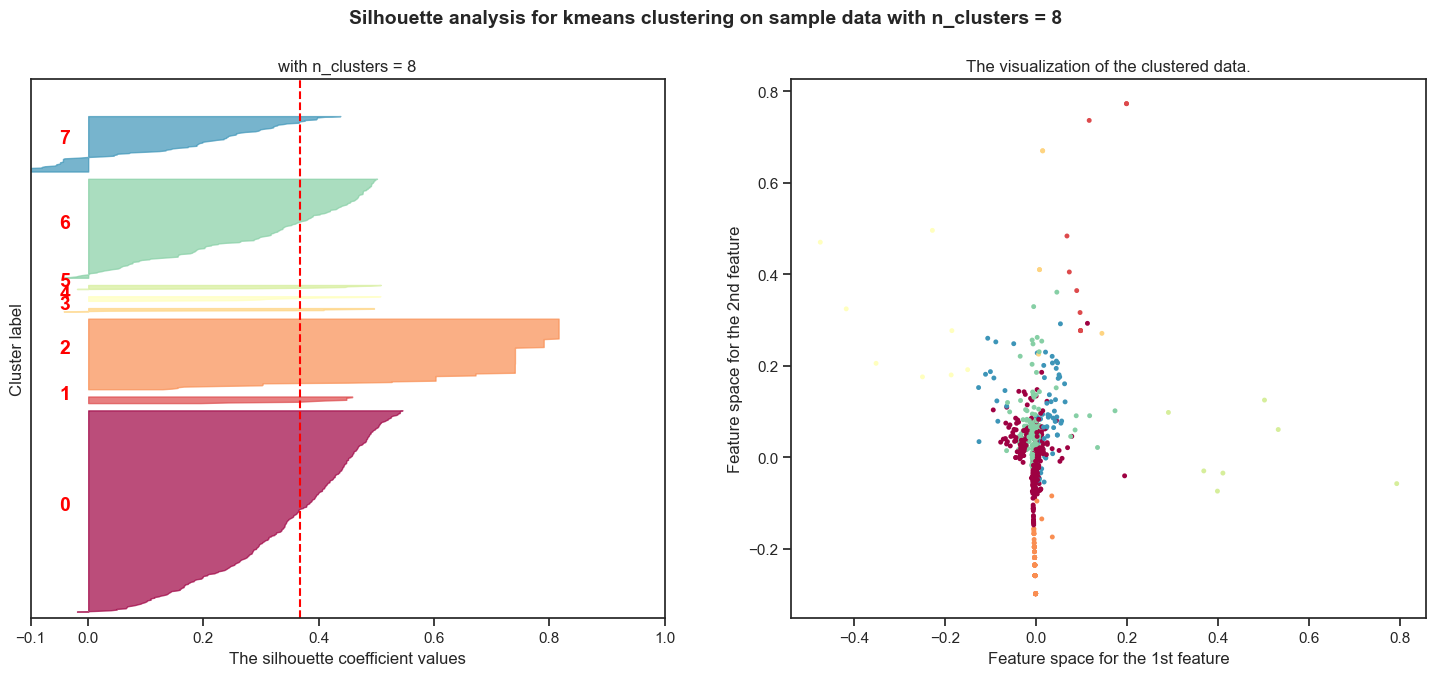

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 9, the average silhouette_score is : 0.3691628700993411


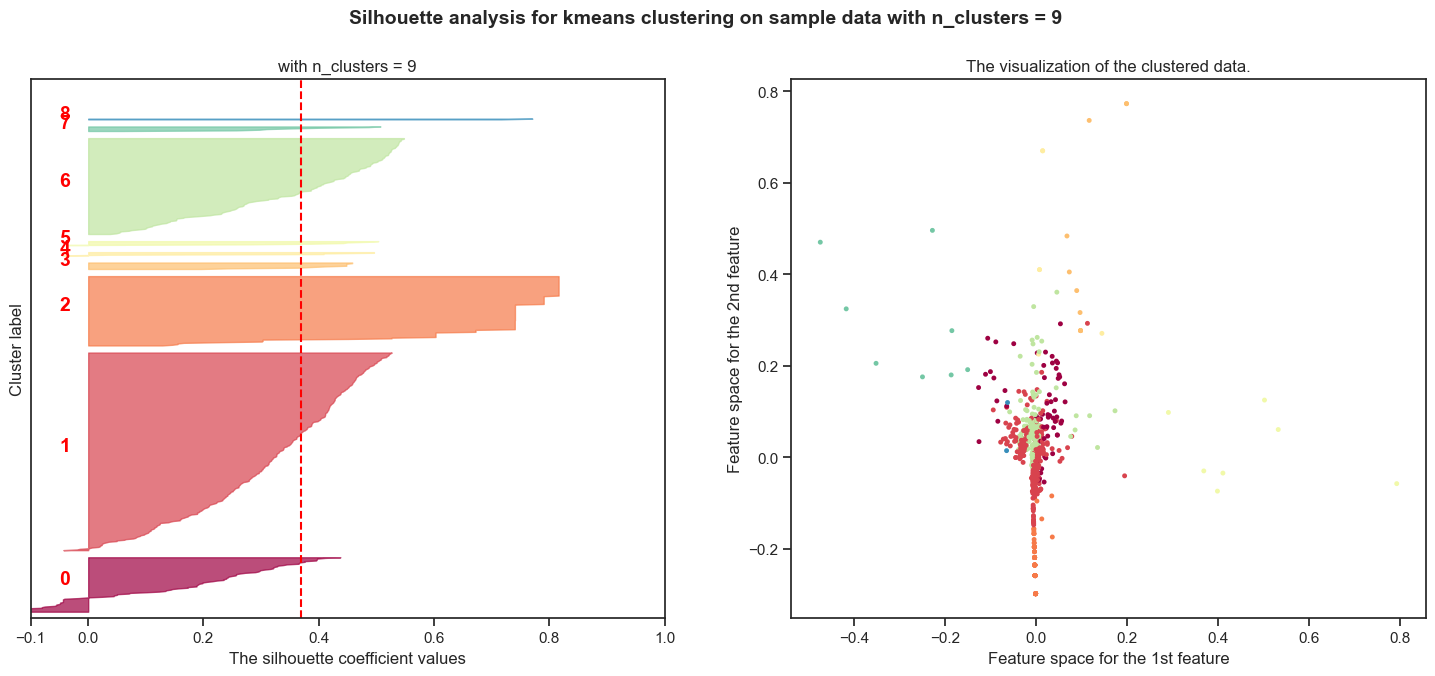

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 10, the average silhouette_score is : 0.3763244814135276


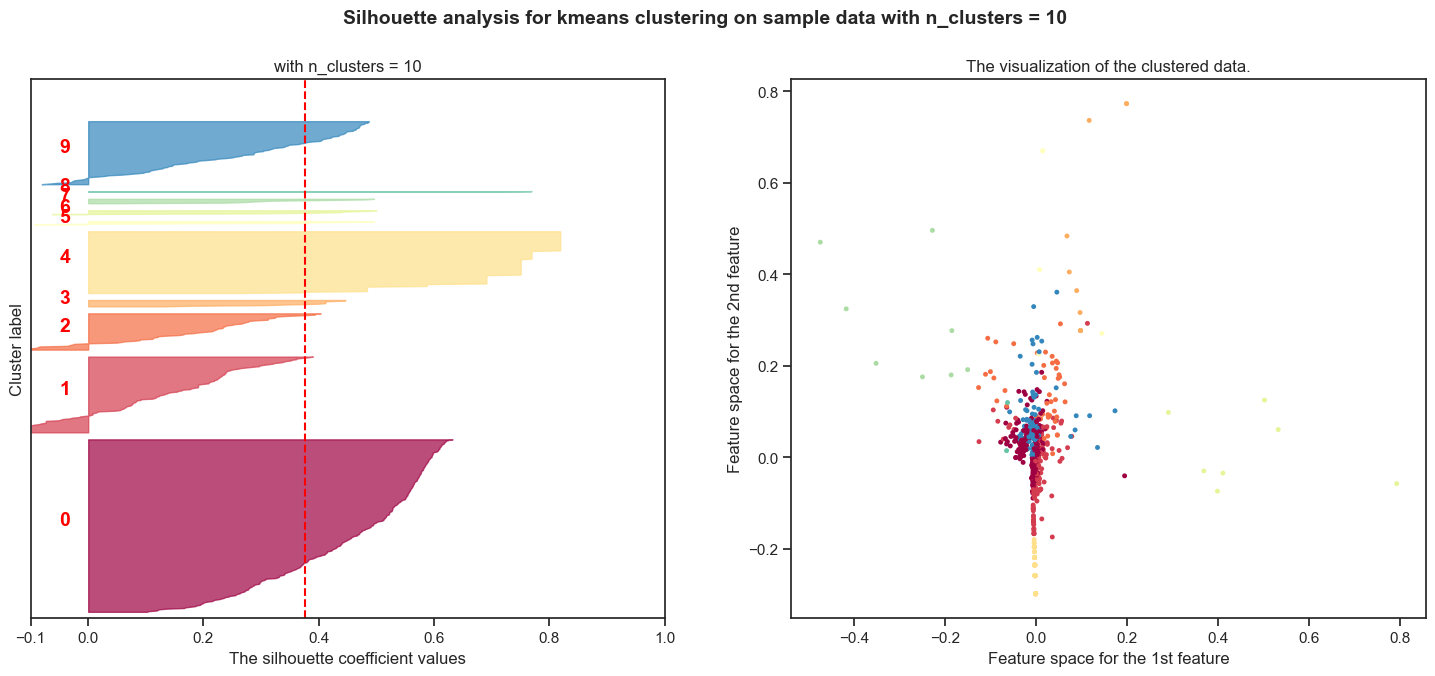

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 11, the average silhouette_score is : 0.37813233743339547


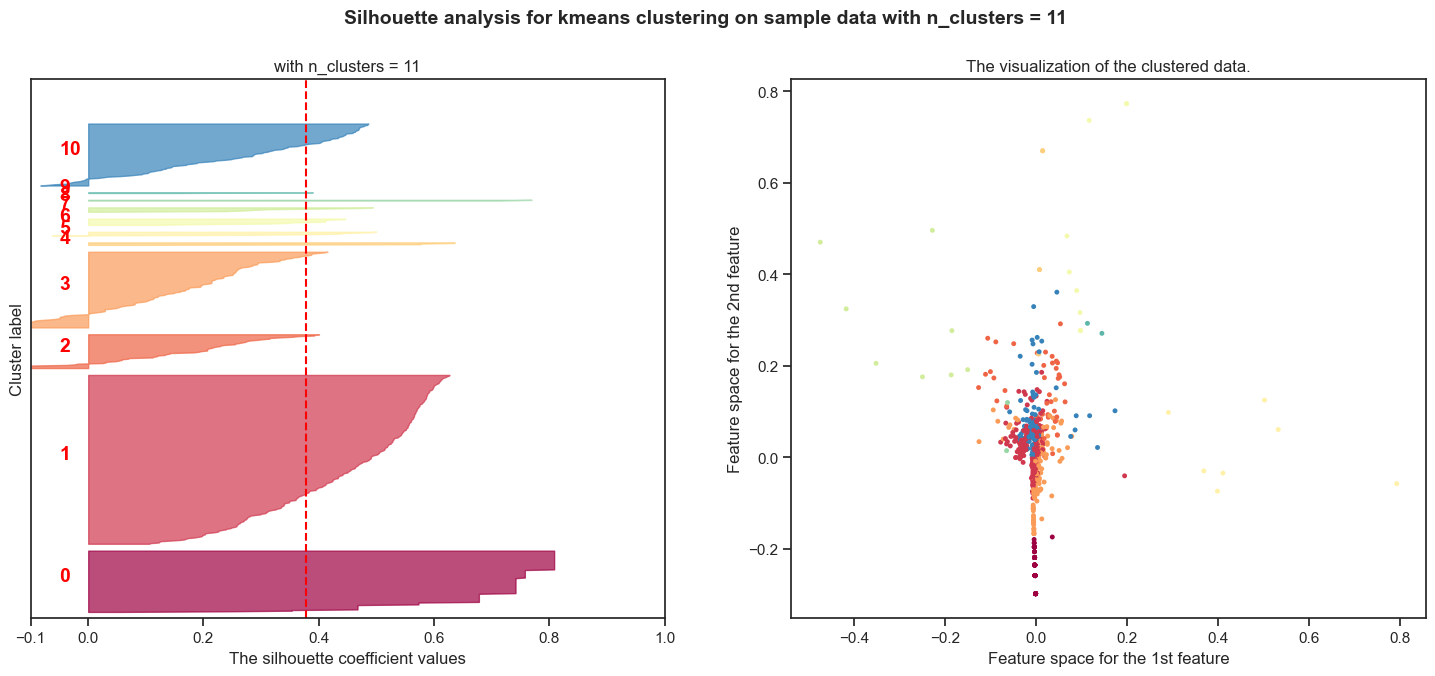

In [221]:
# silhouette score for kmeans
## apply silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
df0 = df_den_pca.copy()
for K in range(2,12):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df0) + (K + 1) * 15])

    model = KMeans(n_clusters=K, random_state=17, max_iter=5000, n_init=100, tol=1e-4)
    model.fit(df0)
    y_spectral = model.labels_

    silhouette_avg = silhouette_score(df0, y_spectral)
    print(f"For n_clusters = {K}, the average silhouette_score is : {silhouette_avg}")

    sample_silhouette_values = silhouette_samples(df0, y_spectral)

    y_lower = 10
    for i in range(K):
        ith_cluster_silhouette_values = sample_silhouette_values[y_spectral == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.colormaps.get_cmap("Spectral")(float(i) / K)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
            )

        ax1.text(
            -0.05,
            y_lower + 0.5 * size_cluster_i,
            str(i),
            color="red",
            fontweight="bold",
            fontsize=14,
            )

        y_lower = y_upper + 10
    
    
    ax1.set_title(f"with n_clusters = {K}")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = plt.colormaps.get_cmap("Spectral")(y_spectral.astype(float) / K)
    ax2.scatter(df0['PC5'], df0['PC2'], marker='.', s=50, lw=0, alpha=1, c=colors, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    plt.suptitle(
        (
            f"Silhouette analysis for kmeans clustering on sample data "
            f"with n_clusters = {K}"
        ),
        fontsize=14,
        fontweight="bold",
        )

    # insert
    plt.show()

con kmeans y normalizado llega a un score de silueta de maximo 0.40, con 11 clusters,  no mejora más de ese punto.

#### DbScan con PCA

In [224]:
# apply dbscan
from sklearn.cluster import DBSCAN

df0 = df_den_pca.copy()

for eps in [0.1, 0.2, 0.3, 0.4, 0.5]:
    for min_samples in [4,5,6,7,8, 9]:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(df0)
        y_dbscan = model.labels_
        n_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
        n_noise = list(y_dbscan).count(-1)
        print(f"eps: {eps}, min_samples: {min_samples}, clusters: {n_clusters}, noise: {n_noise}")

eps: 0.1, min_samples: 4, clusters: 4, noise: 56
eps: 0.1, min_samples: 5, clusters: 2, noise: 70
eps: 0.1, min_samples: 6, clusters: 3, noise: 72
eps: 0.1, min_samples: 7, clusters: 1, noise: 86
eps: 0.1, min_samples: 8, clusters: 1, noise: 90
eps: 0.1, min_samples: 9, clusters: 1, noise: 92
eps: 0.2, min_samples: 4, clusters: 2, noise: 24
eps: 0.2, min_samples: 5, clusters: 2, noise: 25
eps: 0.2, min_samples: 6, clusters: 2, noise: 25
eps: 0.2, min_samples: 7, clusters: 1, noise: 31
eps: 0.2, min_samples: 8, clusters: 1, noise: 32
eps: 0.2, min_samples: 9, clusters: 1, noise: 35
eps: 0.3, min_samples: 4, clusters: 1, noise: 12
eps: 0.3, min_samples: 5, clusters: 1, noise: 13
eps: 0.3, min_samples: 6, clusters: 1, noise: 14
eps: 0.3, min_samples: 7, clusters: 1, noise: 16
eps: 0.3, min_samples: 8, clusters: 1, noise: 16
eps: 0.3, min_samples: 9, clusters: 1, noise: 16
eps: 0.4, min_samples: 4, clusters: 1, noise: 9
eps: 0.4, min_samples: 5, clusters: 1, noise: 9
eps: 0.4, min_samples:

In [118]:
# la mejor opción es eps=0.3 y min_samples=10
# apply dbscan
model = DBSCAN(eps=0.3, min_samples=10)
model.fit(df_pca)
y_dbscan = model.labels_
n_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise = list(y_dbscan).count(-1)
print(f"clusters: {n_clusters}, noise: {n_noise}")



clusters: 4, noise: 46


c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


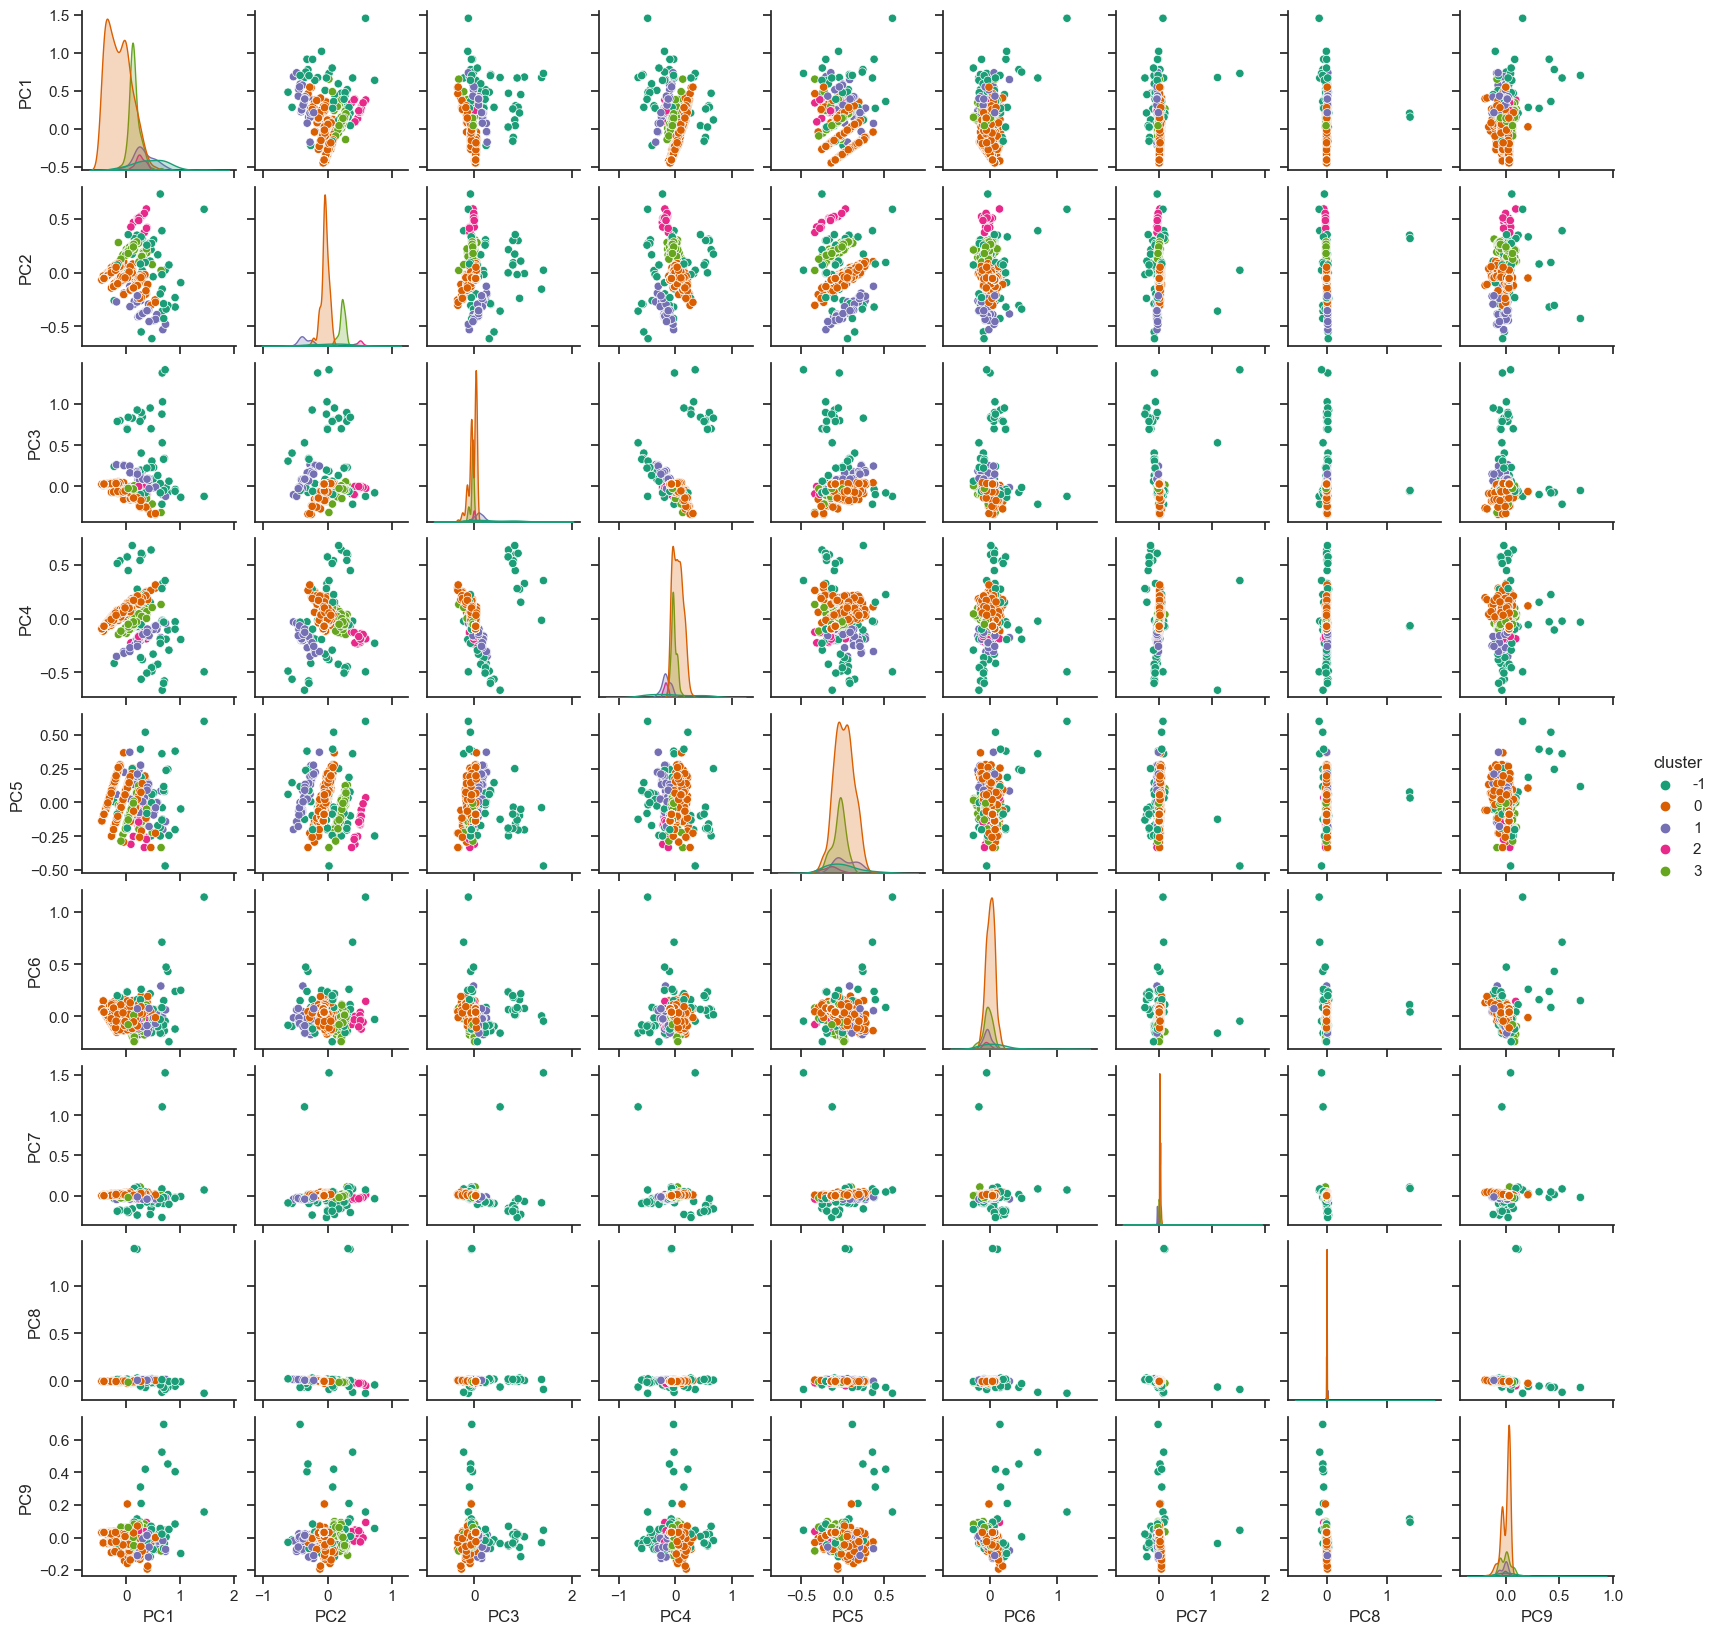

In [119]:
# plot dbscan with a pairplot
df0 = df_pca.copy()
df0['cluster'] = y_dbscan
#df0 = df0[df0['cluster'] != -1]


sns.pairplot(df0, hue='cluster', palette='Dark2', diag_kind='kde', height=1.85)

In [120]:
df0['cluster'].value_counts()

 0    443
 3    124
 1     52
-1     46
 2     17
Name: cluster, dtype: int64

In [107]:
df0

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -0.313996  0.009662  0.021980 -0.051182  0.038912  0.073440  0.013952   
1   -0.186015 -0.084896 -0.077157 -0.022039 -0.138324  0.136892  0.013028   
2   -0.144646 -0.070178 -0.074369  0.000851 -0.086102  0.114947  0.014596   
3   -0.364196 -0.009423  0.018427 -0.078204 -0.025410  0.098116  0.011757   
4    0.645316 -0.383417 -0.013289 -0.176348  0.084430  0.290847 -0.042807   
..        ...       ...       ...       ...       ...       ...       ...   
677 -0.452042 -0.066610  0.025993 -0.095241 -0.136839  0.072121 -0.001886   
678 -0.413075 -0.053149  0.029773 -0.071275 -0.088060  0.040518 -0.001151   
679 -0.413075 -0.053149  0.029773 -0.071275 -0.088060  0.040518 -0.001151   
680 -0.413075 -0.053149  0.029773 -0.071275 -0.088060  0.040518 -0.001151   
681 -0.413075 -0.053149  0.029773 -0.071275 -0.088060  0.040518 -0.001151   

          PC8       PC9  cluster  
0   -0.004279 -0.021138        0  
1    0.001753 -0.049562        0  
2   -0.000334 -0.037148        0  
3   -0.002050 -0.030946        0  
4   -0.002632 -0.080271        1  
..        ...       ...      ...  
677 -0.002394  0.030118        0  
678 -0.002768  0.031394        0  
679 -0.002768  0.031394        0  
680 -0.002768  0.031394        0  
681 -0.002768  0.031394        0  

[636 rows x 10 columns]

In [108]:
clus = model.labels_[model.labels_ != -1]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0,
       0, 0, 3, 3, 2, 0, 1, 3, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 3, 3, 0, 3, 0, 1, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3,
       0, 0, 1, 0, 3, 3, 3, 3, 0, 3, 2, 0, 0, 2, 3, 0, 0, 0, 0, 3, 0, 0,
       1, 3, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 2,
       0, 0, 0, 1, 0, 1, 2, 0, 3, 3, 2, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0,
       0, 0, 1, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0,
       0, 0, 1, 0, 0, 2, 0, 3, 3, 0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 1, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 3, 0, 0, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 3,

For eps = 0.3, min_samples = 8 the average silhouette_score is : 0.7239575665192038


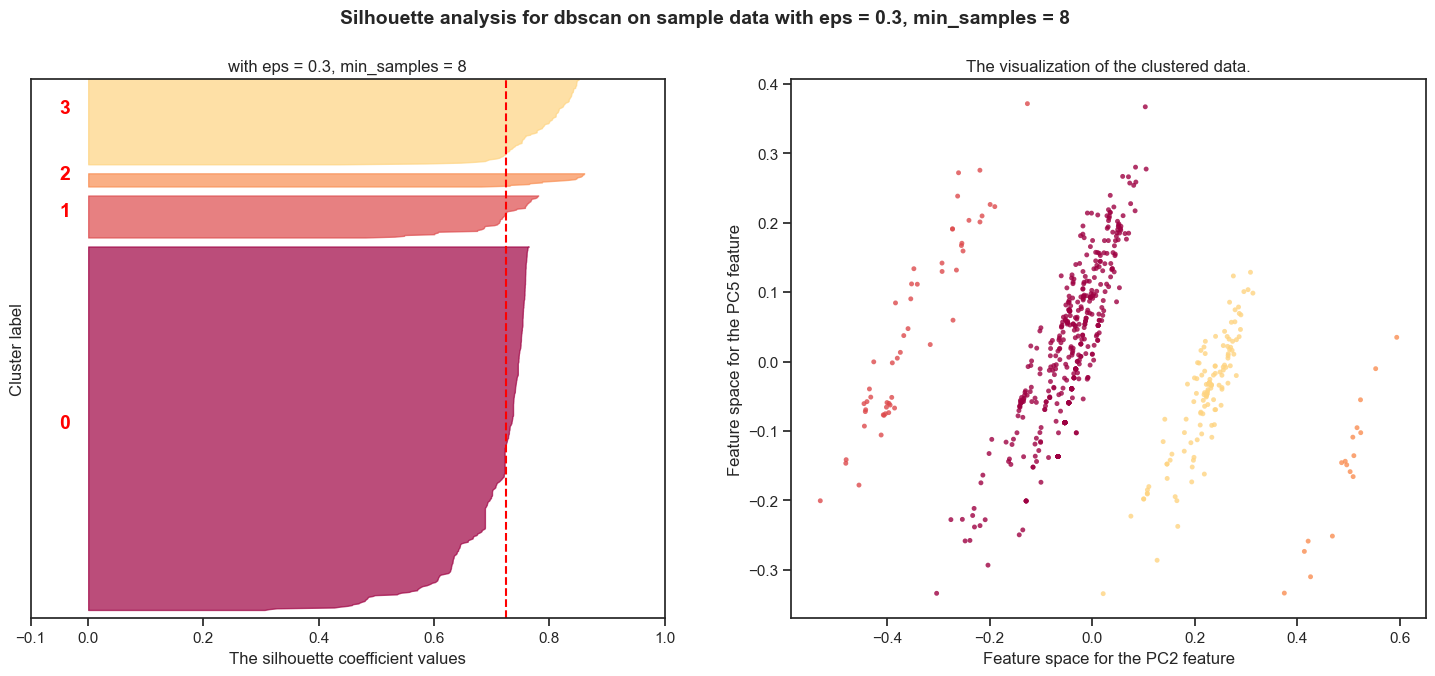

For eps = 0.3, min_samples = 10 the average silhouette_score is : 0.7239575665192038


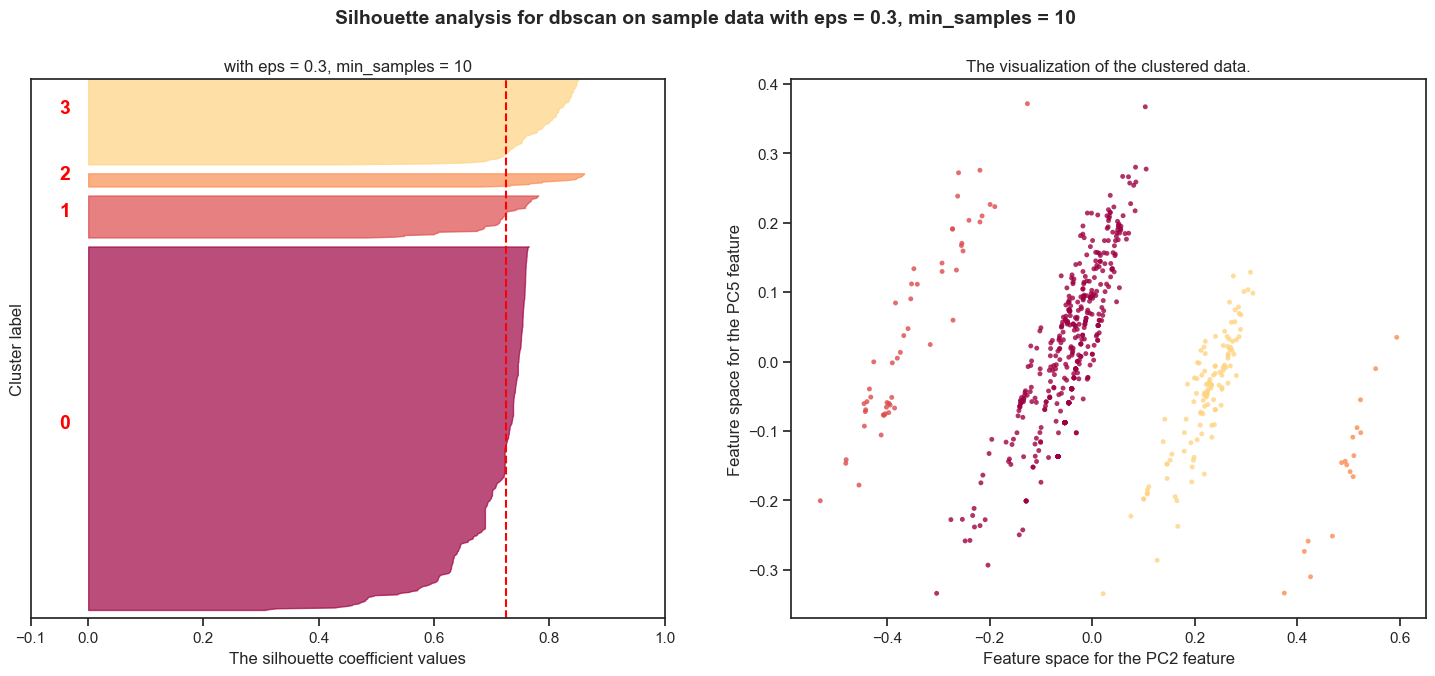

For eps = 0.3, min_samples = 12 the average silhouette_score is : 0.7239575665192038


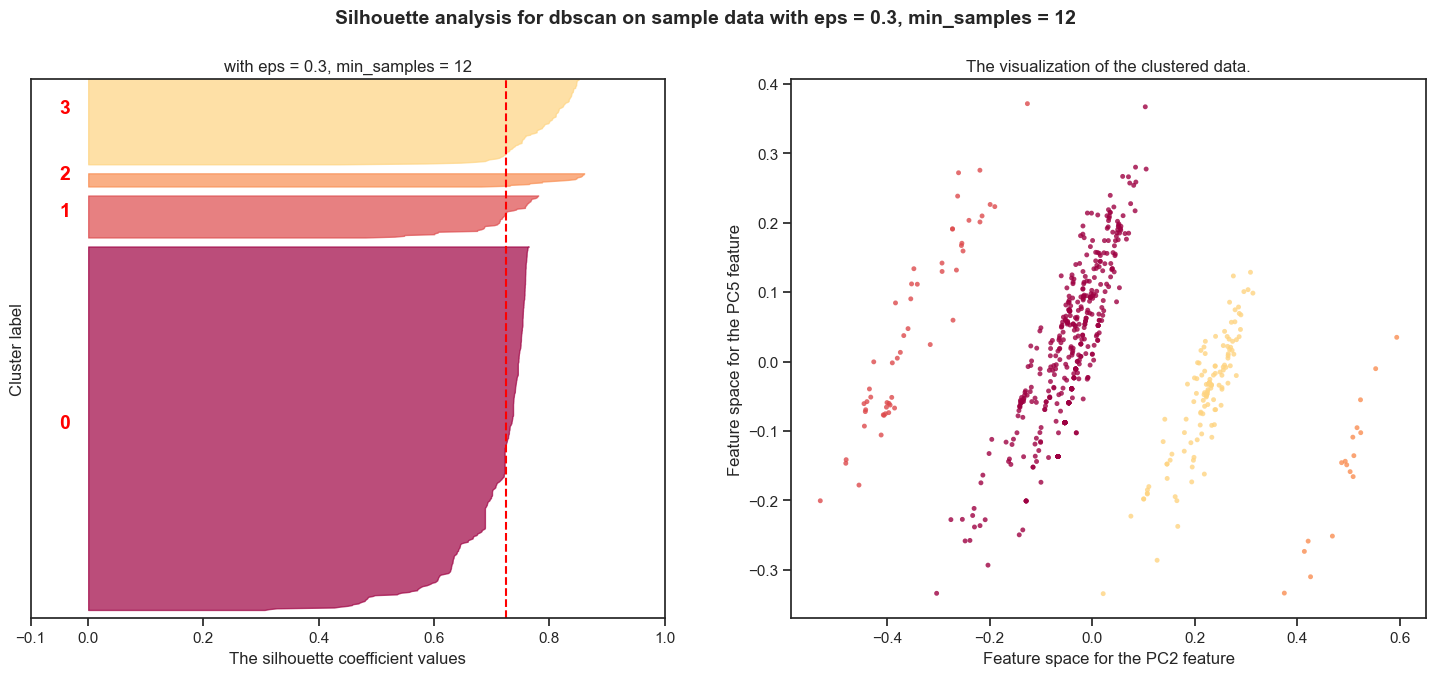

For eps = 0.3, min_samples = 14 the average silhouette_score is : 0.7239575665192038


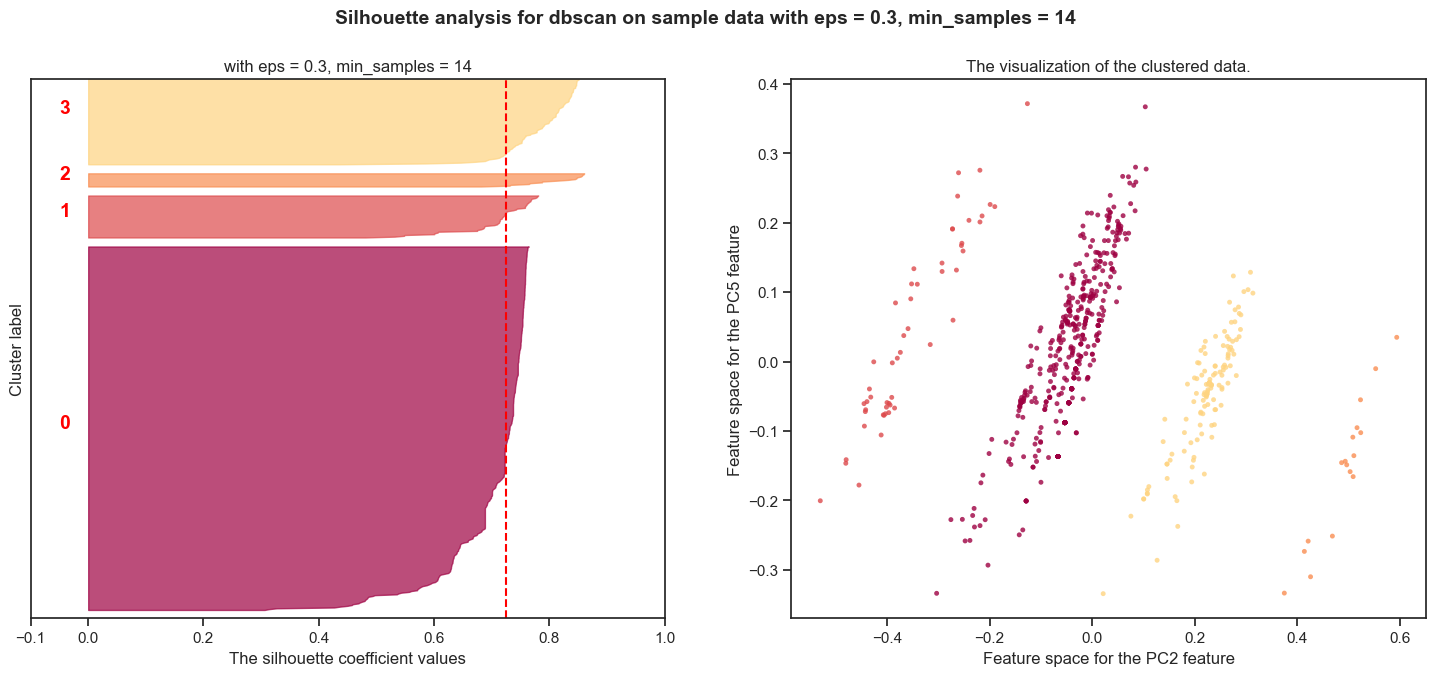

For eps = 0.4, min_samples = 8 the average silhouette_score is : 0.7239575665192038


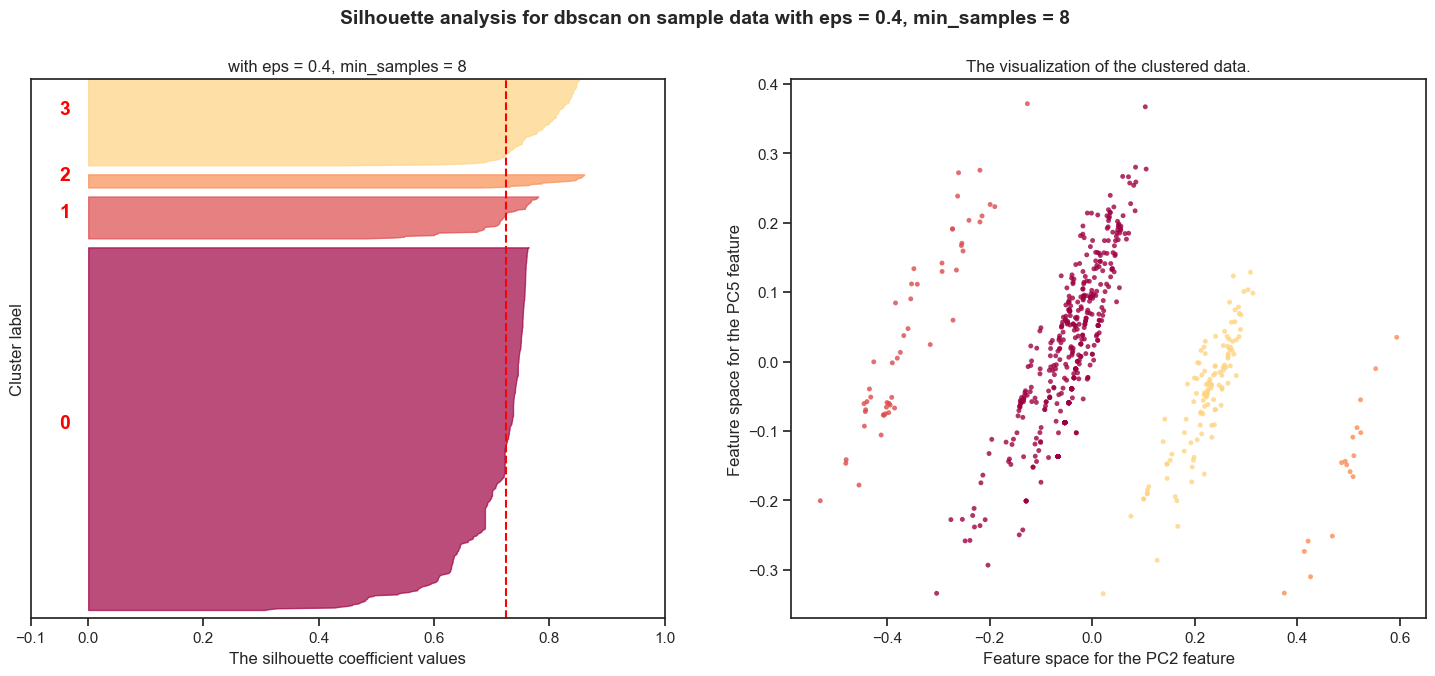

For eps = 0.4, min_samples = 10 the average silhouette_score is : 0.7239575665192038


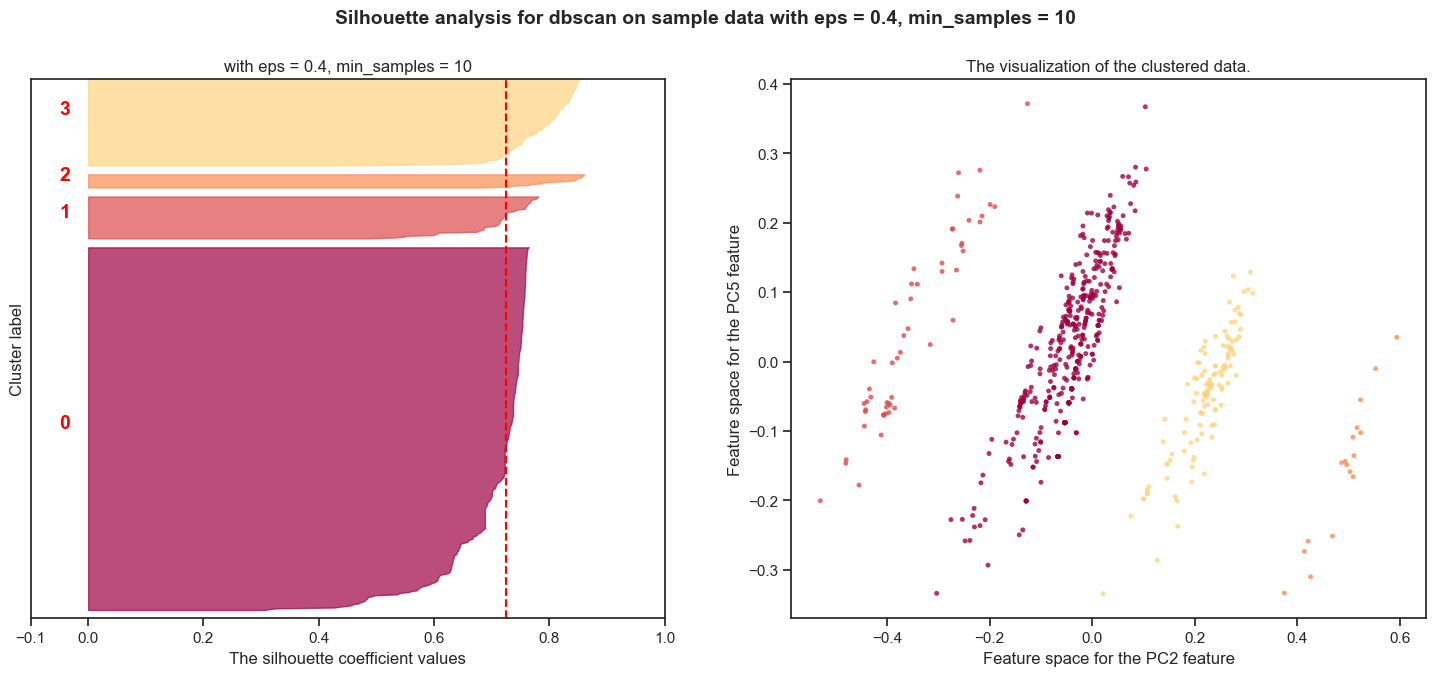

For eps = 0.4, min_samples = 12 the average silhouette_score is : 0.7239575665192038


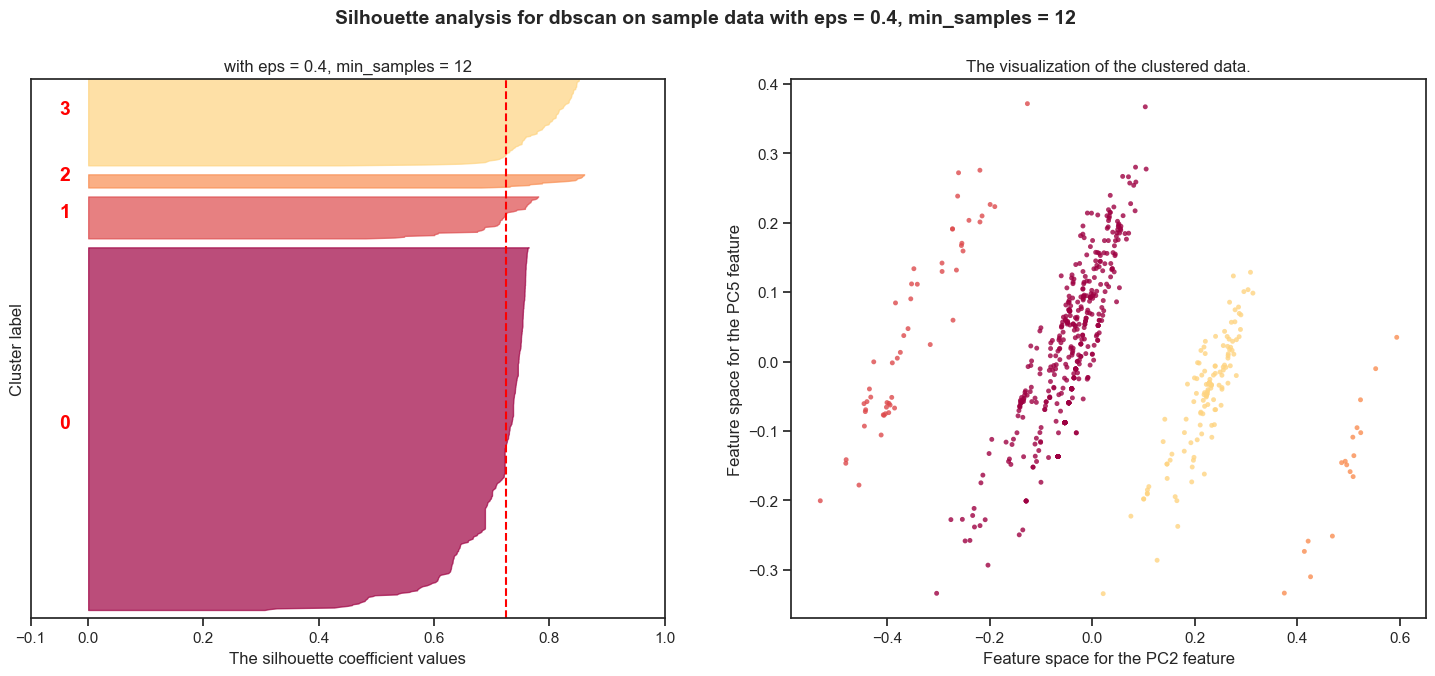

For eps = 0.4, min_samples = 14 the average silhouette_score is : 0.7239575665192038


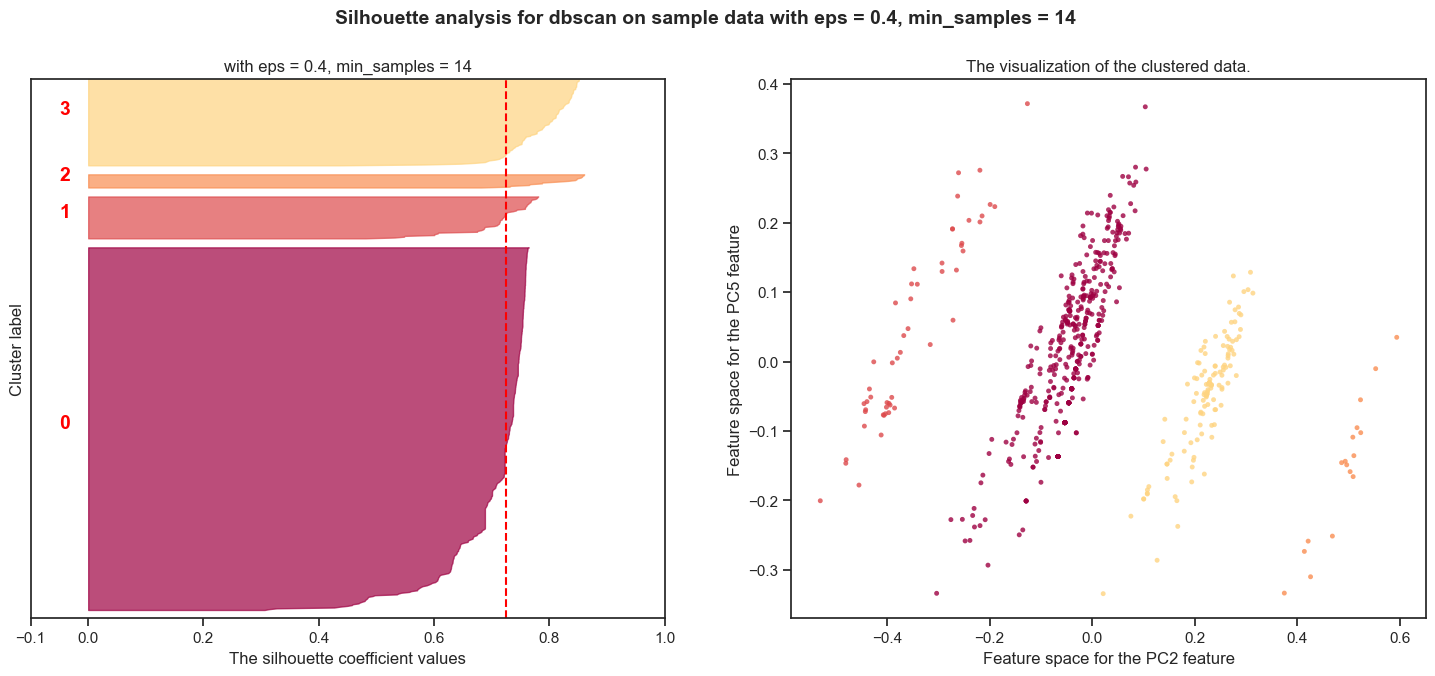

For eps = 0.5, min_samples = 8 the average silhouette_score is : 0.7239575665192038


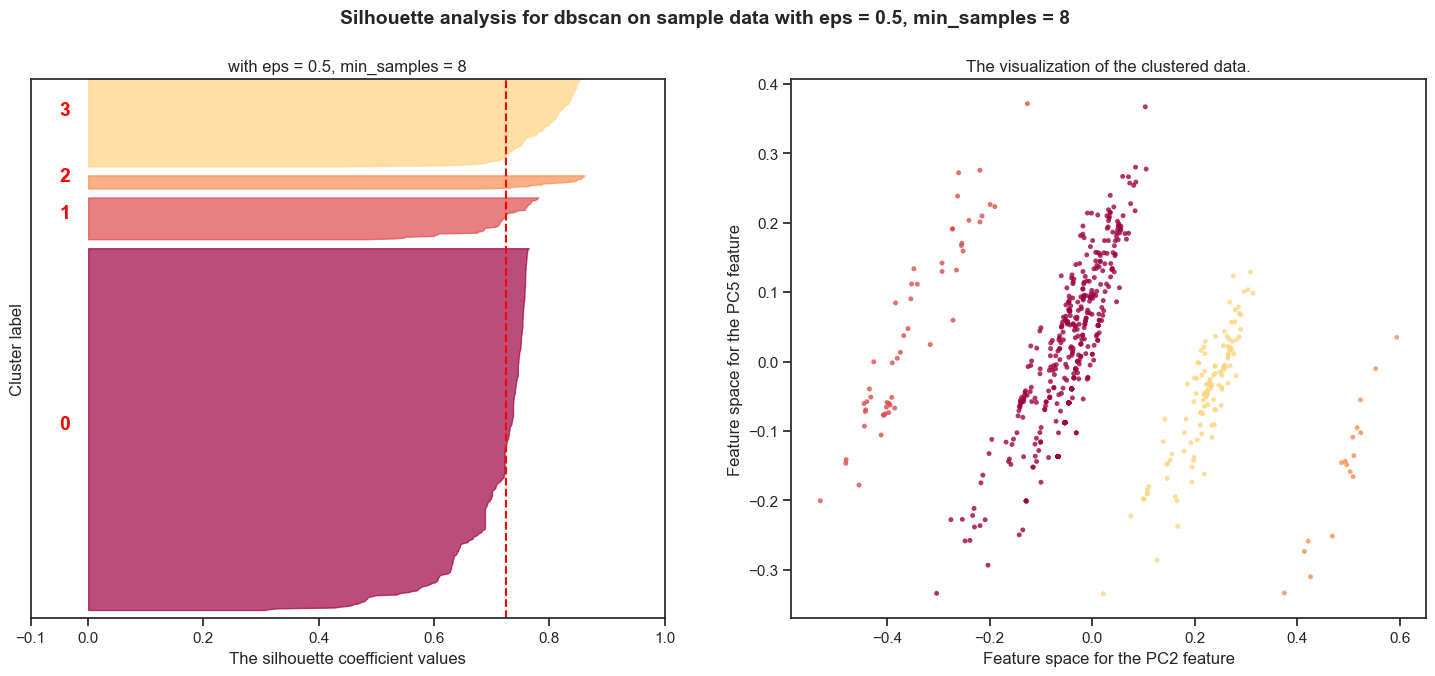

For eps = 0.5, min_samples = 10 the average silhouette_score is : 0.7239575665192038


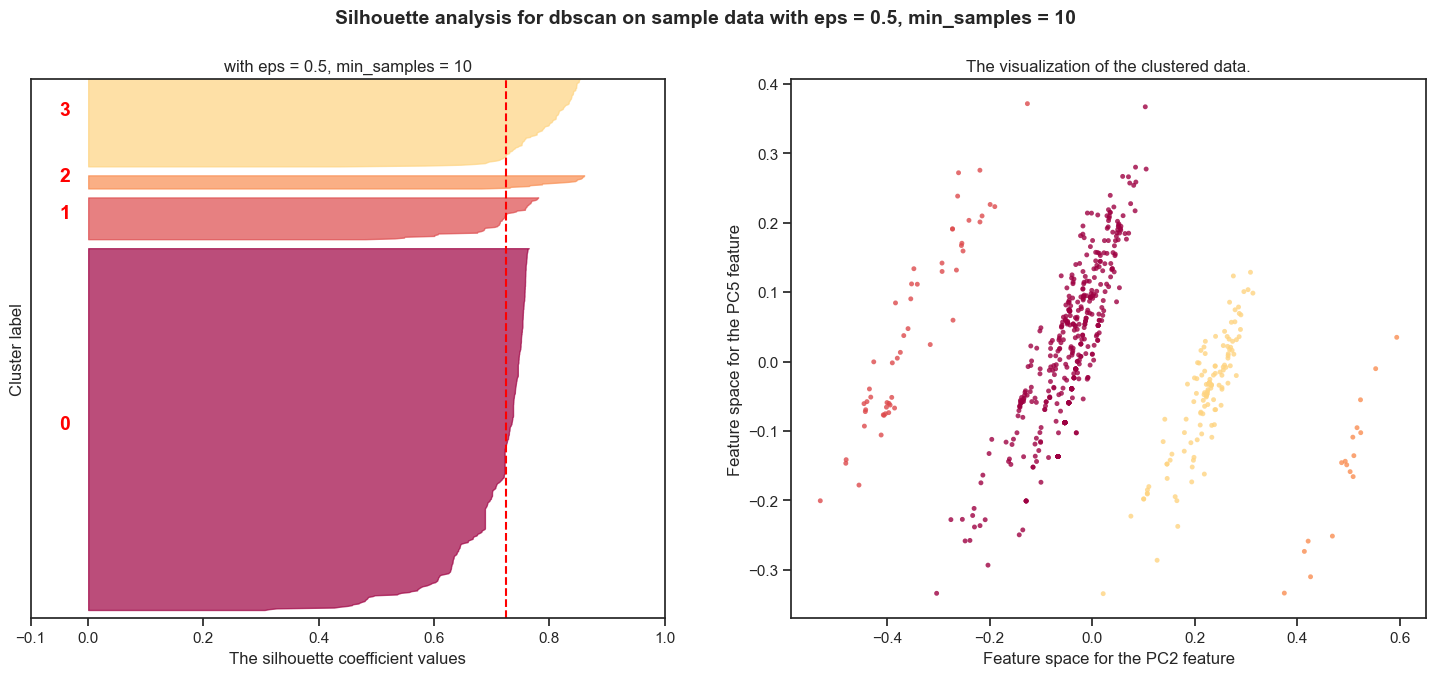

For eps = 0.5, min_samples = 12 the average silhouette_score is : 0.7239575665192038


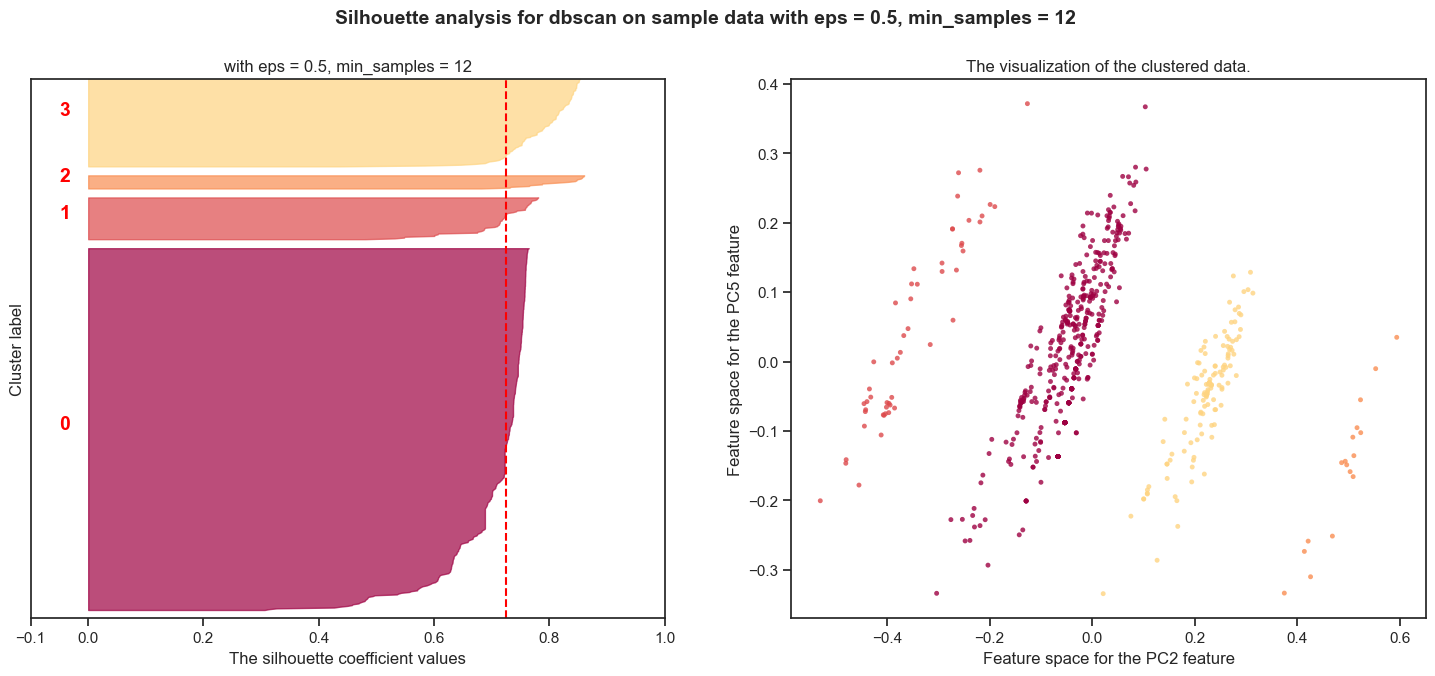

For eps = 0.5, min_samples = 14 the average silhouette_score is : 0.7239575665192038


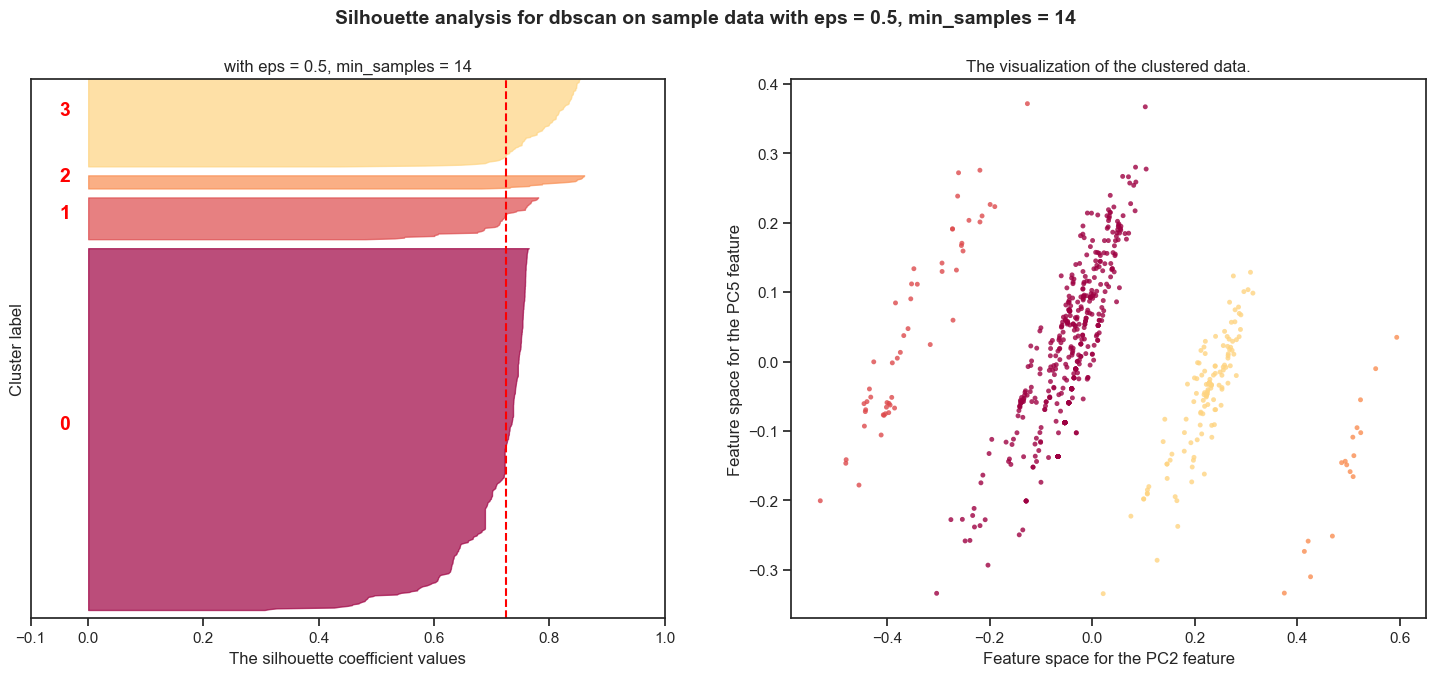

In [110]:
for K in [0.3, 0.4, 0.5]:
    for M in range(8,15,2):
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(df0) + (K + 1) * 15])

        db = DBSCAN(eps=K, min_samples=M)
        db.fit(df0)
        clusters = db.labels_
        clusters = db.labels_[db.labels_ != -1]

        silhouette_avg = silhouette_score(df0, clusters)
        print(f"For eps = {K}, min_samples = {M} the average silhouette_score is : {silhouette_avg}")

        sample_silhouette_values = silhouette_samples(df0, clusters)

        y_lower = 10
        for i in np.unique( clusters ):
            ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.colormaps.get_cmap("Spectral")(abs(float(i))*0.5 / len(np.unique( clusters )))
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
                )

            ax1.text(
                -0.05,
                y_lower + 0.5 * size_cluster_i,
                str(i),
                color="red",
                fontweight="bold",
                fontsize=14,
                )

            y_lower = y_upper + 10
        
        
        ax1.set_title(f"with eps = {K}, min_samples = {M}")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = plt.colormaps.get_cmap("Spectral")(abs(clusters.astype(float))*0.5 / len(np.unique( clusters )))
        ax2.scatter(df0['PC2'], df0['PC5'], marker='.', s=50, lw=0, alpha=0.8, c=colors, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the PC2 feature")
        ax2.set_ylabel("Feature space for the PC5 feature")
        
        plt.suptitle(
            (
                f"Silhouette analysis for dbscan on sample data "
                f"with eps = {K}, min_samples = {M}"
            ),
            fontsize=14,
            fontweight="bold",
            )

        # insert
        plt.show()

En promedio da un score de silueta de 74% con 4 clusters, sin contar el ruido. 

#### Interpretabilidad de los grupos encontrados
Ahora para poder dar explicabilidad e interpretabilidad a estos grupos, vamos a llevar esta clusterización al espacio de datos original, para ver que caracteristicas tienen en común los grupos encontrados.

In [124]:
df_pdn_scaled['cluster'] = y_dbscan

redsecuritycheckscount  redsecurityresourcescount  \
0                  0.111111                   0.043478   
1                  0.111111                   0.014493   
2                  0.111111                   0.028986   
3                  0.111111                   0.014493   
4                  0.222222                   0.202899   
..                      ...                        ...   
677                0.000000                   0.000000   
678                0.000000                   0.000000   
679                0.000000                   0.000000   
680                0.000000                   0.000000   
681                0.000000                   0.000000   

     yellowsecuritycheckscount  yellowsecurityresourcescount  \
0                     0.047619                      0.002219   
1                     0.095238                      0.000740   
2                     0.095238                      0.002959   
3                     0.047619                      0.000740   
4                     0.285714                      0.038462   
..                         ...                           ...   
677                   0.000000                      0.000000   
678                   0.000000                      0.000000   
679                   0.000000                      0.000000   
680                   0.000000                      0.000000   
681                   0.000000                      0.000000   

     redfaulttolerancecheckscount  redfaulttoleranceresourcescount  \
0                             0.0                         0.000000   
1                             0.0                         0.000000   
2                             0.0                         0.000000   
3                             0.0                         0.000000   
4                             0.5                         0.717949   
..                            ...                              ...   
677                           0.0                         0.000000   
678                           0.0                         0.000000   
679                           0.0                         0.000000   
680                           0.0                         0.000000   
681                           0.0                         0.000000   

     yellowfaulttolerancecheckscount  yellowfaulttoleranceresourcescount  \
0                               0.00                            0.000000   
1                               0.25                            0.009259   
2                               0.25                            0.018519   
3                               0.00                            0.000000   
4                               0.75                            0.009259   
..                               ...                                 ...   
677                             0.00                            0.000000   
678                             0.00                            0.000000   
679                             0.00                            0.000000   
680                             0.00                            0.000000   
681                             0.00                            0.000000   

     redperformancecheckscount  redperformanceresourcescount  \
0                          0.0                           0.0   
1                          0.0                           0.0   
2                          0.0                           0.0   
3                          0.0                           0.0   
4                          0.0                           0.0   
..                         ...                           ...   
677                        0.0                           0.0   
678                        0.0                           0.0   
679                        0.0                           0.0   
680                        0.0                           0.0   
681                        0.0                           0.0   

     yellowperfo

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


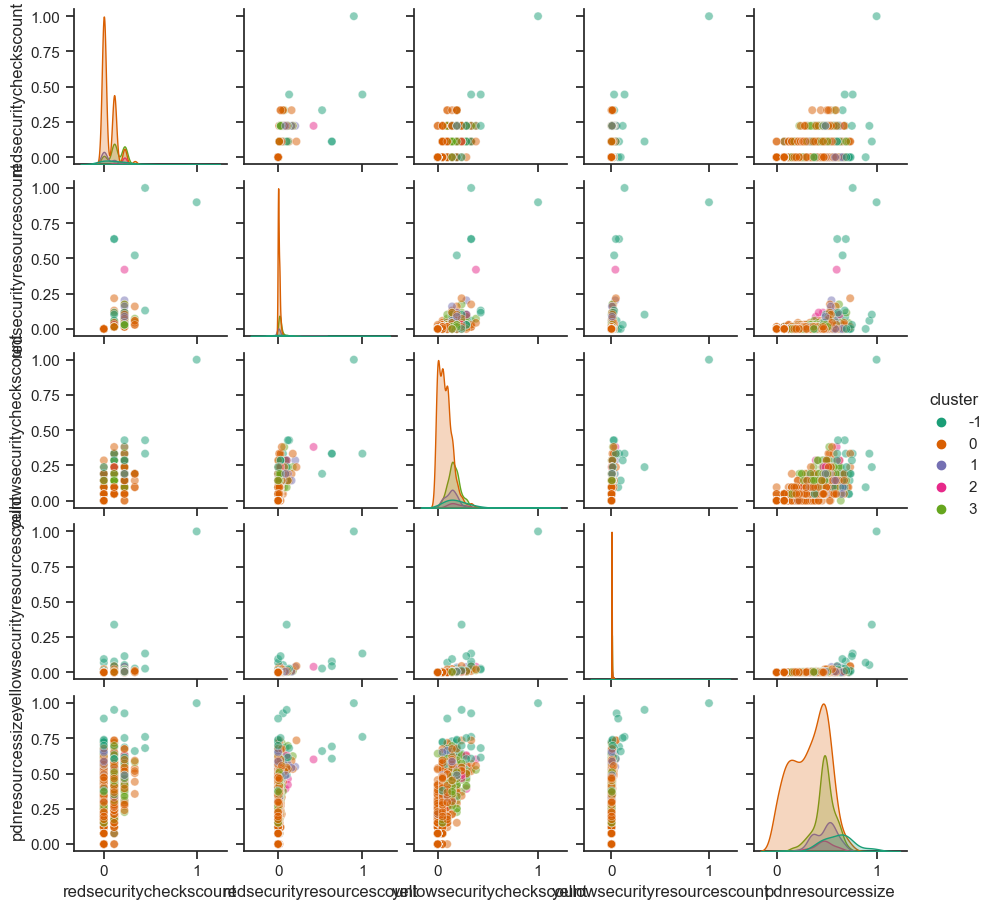

In [131]:
# plot scatter matrix using seaborn
sns.pairplot(df_pdn_scaled.filter(regex="security|cluster|pdnresourcessize", axis=1), hue='cluster', palette='Dark2', diag_kind='kde', height=1.85, plot_kws={'alpha': 0.5})

In [133]:
# medias para cada cluster
df_mean = df_pdn_scaled.groupby('cluster').mean()

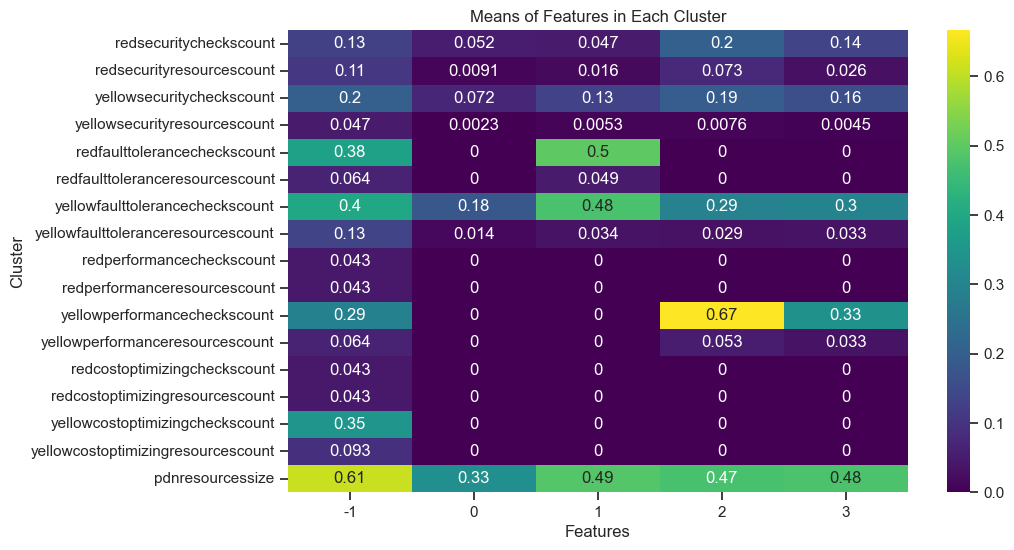

In [149]:
# Create a heatmap to visualize the means of features in each cluster
plt.figure(figsize=(10, 6))
sns.heatmap(df_mean.T, cmap='viridis', annot=True)
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.title('Means of Features in Each Cluster')
plt.show()

**Grupos**:
- grupo 0 - pequeña con cuidados: bajo checks de seguridad, tamaño de aplicacion pequeño.
- grupo 1 - joven con riesgos: altos flags en tolerancia a fallos, pocos flags de seguridad, tamaño de aplicacion normal
- grupo 2 - requiere atención: muchos flags de performance, cantidad importante de flags de security, moderada cantidad de flags de tolerancia de fallos, tamaño de aplicacion normal
- grupo 3 - próxima a recibir atención: flags moderados en performance, moderada cantidad de flags de tolerancia de fallos, cantidad moderada de flags en seguridad, tamaño de aplicacion normal
- grupo -1 - requiere atención personalizada: Tamaño de aplicación grande, flags de optimización de costos moderado, flags de performance moderado, flags de fault tolerance considerables, flags de seguridad considerables.


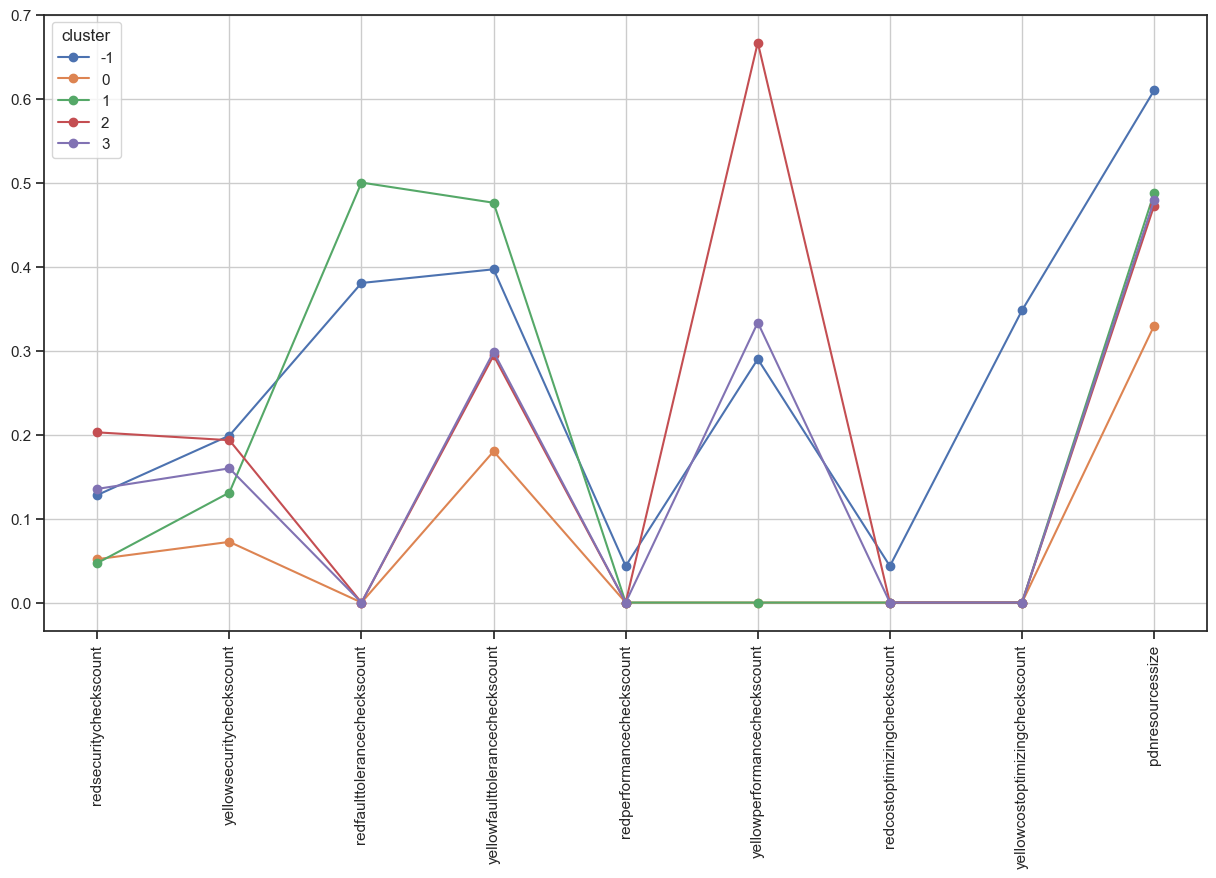

In [152]:
# plot mean of clusters
df_mean.filter(regex="checks|pdnresourcessize").T.plot(figsize=(15, 8), marker='o')
# set xticks vertical
plt.xticks(ticks=range(df_mean.filter(regex="checks|pdnresourcessize").shape[1]), labels= df_mean.filter(regex="checks|pdnresourcessize").columns.to_list(), rotation=90)
plt.grid(True)
plt.show()

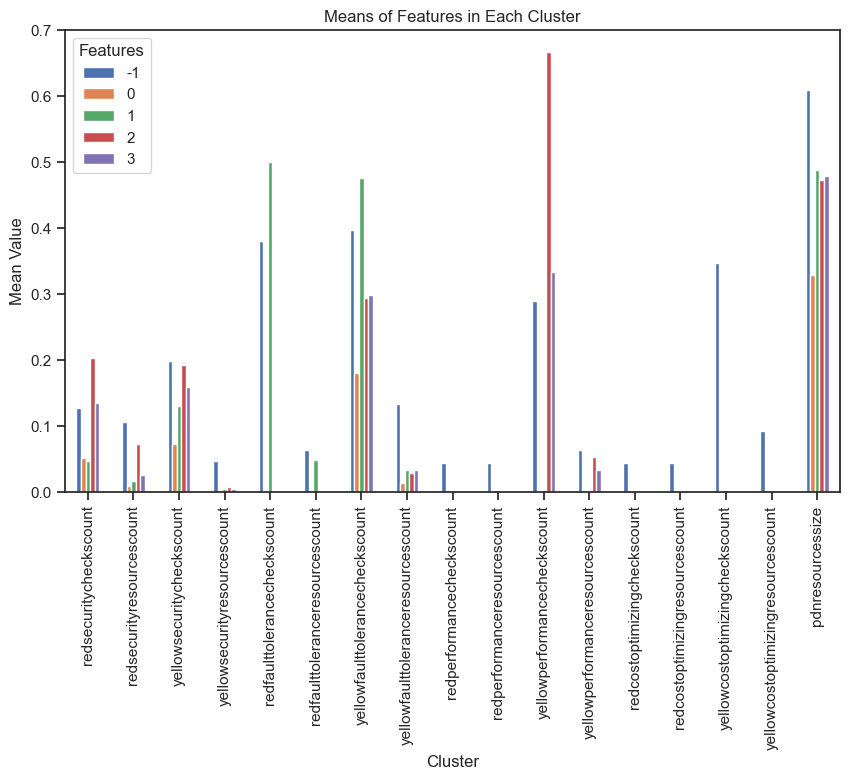

In [155]:
# Plot the means of features for each cluster using a bar chart
df_mean.T.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.title('Means of Features in Each Cluster')
plt.legend(title='Features')
plt.show()

array([[<Axes: xlabel='redsecuritycheckscount', ylabel='redsecuritycheckscount'>,
        <Axes: xlabel='redsecurityresourcescount', ylabel='redsecuritycheckscount'>,
        <Axes: xlabel='yellowsecuritycheckscount', ylabel='redsecuritycheckscount'>,
        <Axes: xlabel='yellowsecurityresourcescount', ylabel='redsecuritycheckscount'>,
        <Axes: xlabel='pdnresourcessize', ylabel='redsecuritycheckscount'>,
        <Axes: xlabel='cluster', ylabel='redsecuritycheckscount'>],
       [<Axes: xlabel='redsecuritycheckscount', ylabel='redsecurityresourcescount'>,
        <Axes: xlabel='redsecurityresourcescount', ylabel='redsecurityresourcescount'>,
        <Axes: xlabel='yellowsecuritycheckscount', ylabel='redsecurityresourcescount'>,
        <Axes: xlabel='yellowsecurityresourcescount', ylabel='redsecurityresourcescount'>,
        <Axes: xlabel='pdnresourcessize', ylabel='redsecurityresourcescount'>,
        <Axes: xlabel='cluster', ylabel='redsecurityresourcescount'>],
       [<Axes:

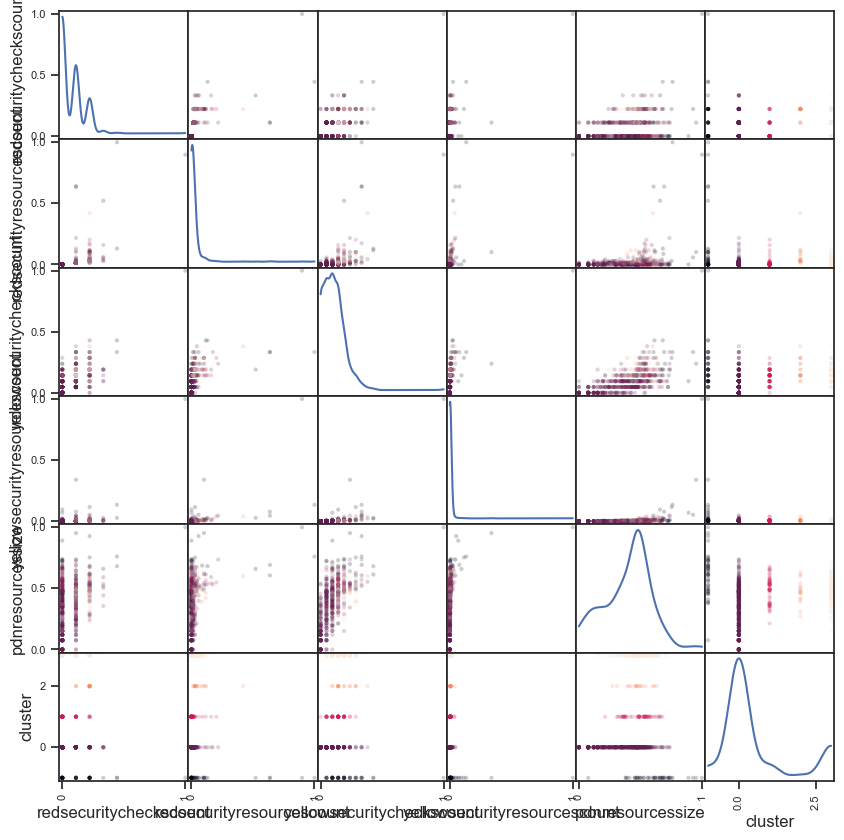

In [128]:
# plot scatter matrix using seaborn
scatter_matrix(df_pdn_scaled.filter(regex="security|cluster|pdnresourcessize", axis=1), c=df_pdn_scaled['cluster'], alpha=0.2, figsize=(10, 10), diagonal='kde')

In [20]:
componentes_principales = pca.components_[:3] # Seleccionamos los primeros 3 componentes principales

# Multiplicamos los datos originales por los componentes principales seleccionados
pdn_reducido = df_pdn_scaled.dot(componentes_principales.T)
print(f"Tipo pdn_reducido: {type(pdn_reducido)}")

Tipo pdn_reducido: <class 'numpy.ndarray'>


In [21]:
# Llevamos el pdn_reducido a df
df_pdn_reducido = pd.DataFrame(data=pdn_reducido, columns=['CP1', 'CP2', 'CP3'])
df_pdn_reducido.describe()

CP1           CP2           CP3
count  6.820000e+02  6.820000e+02  6.820000e+02
mean  -1.250222e-16  7.292961e-17  1.562777e-17
std    2.095516e+00  1.917327e+00  1.728276e+00
min   -2.030192e+00 -1.850120e+01 -5.270530e+00
25%   -1.194845e+00 -6.170038e-01 -1.942541e-01
50%   -3.499834e-01 -1.648159e-02 -4.874450e-02
75%    7.200682e-01  6.049998e-01  1.390971e-01
max    2.795853e+01  2.631205e+01  3.202577e+01

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

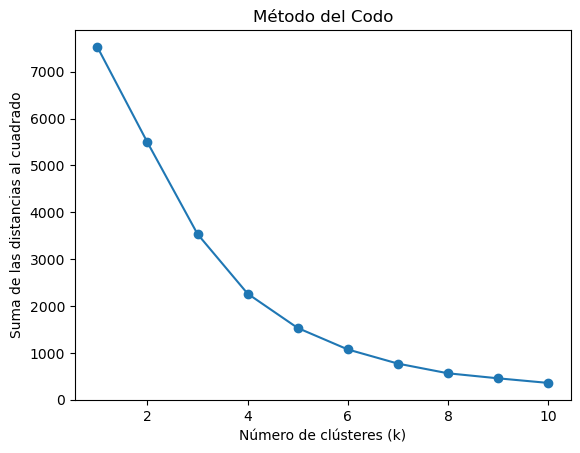

In [22]:
# Utilizamos el método de la "silueta" para determinar el número adecuado de clústers

sum_of_squared_distances = []

# Prueba de diferentes valores de K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pdn_reducido) # Usnado el ndarray
#     kmeans.fit(df_pdn_reducido) # Usnado el df
    
    sum_of_squared_distances.append(kmeans.inertia_)

# Graficar la suma de las distancias al cuadrado en función de k
plt.plot(range(1, 11),
         sum_of_squared_distances, marker='o')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de las distancias al cuadrado')
plt.title('Método del Codo')
plt.show()

In [23]:
# Podemos determinar que el número de clúster apropiado puede estar entre 4 y 5
# Seleccionamos k=5

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(df_pdn_reducido)

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


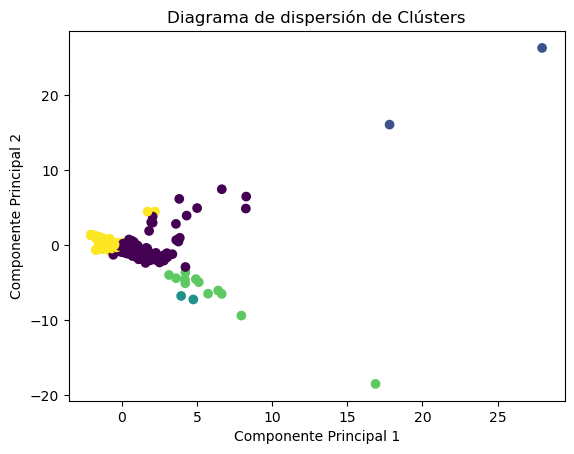

In [24]:
# Ahora visualicemos los clústers
# Usando ndarrary
# x = pdn_reducido[:, 0]
# y = pdn_reducido[:, 1]

# Usando df
x = df_pdn_reducido[['CP1']]
y = df_pdn_reducido[['CP2']]

# Grafiquemos los puntos de datos con colores de acuerdo a sus etiquetas de clúster
plt.scatter(x, y, c=cluster_labels, cmap='viridis')
plt.title('Diagrama de dispersión de Clústers')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [25]:
# Agregamos los cluster al df
df_pdn_reducido['cluster'] = cluster_labels
df_pdn_reducido

CP1       CP2       CP3  cluster
0   -1.207314 -0.133430  0.106783        4
1   -0.984641 -0.375438 -0.059762        4
2   -0.784317 -0.778926 -0.164896        4
3   -1.434360  0.213013  0.176994        4
4    5.125483 -4.927224 -2.800935        3
..        ...       ...       ...      ...
677 -2.030192  1.360245  0.318303        4
678 -1.911982  1.292331  0.295129        4
679 -1.911982  1.292331  0.295129        4
680 -1.911982  1.292331  0.295129        4
681 -1.911982  1.292331  0.295129        4

[682 rows x 4 columns]

In [106]:
# Ahora llevamos nuestros clúster a la data original
df_full_pdn['cluster'] = cluster_labels
df_full_pdn

C:\Users\2542088\AppData\Local\Temp\ipykernel_27964\2825177243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_pdn['cluster'] = cluster_labels


application_id  organization_id  provider_id  snapshot_date_id  \
0                59                1            1          20231021   
1               625                1            1          20231021   
2               324                1            1          20231021   
3               736                1            1          20231021   
4               785                1            1          20231021   
..              ...              ...          ...               ...   
855             216                1            1          20231021   
856             217                1            1          20231021   
857             420                1            1          20231021   
858             748                1            1          20231021   
859             910                1            1          20231021   

    applicationcode  fullresourcescount  devresourcescount  qaresourcescount  \
0          app00059                  29                 18                 4   
1          app00625                  28                 24                 1   
2          app00324                   9                  1                 2   
3          app00736                   6                  3                 0   
4          app00785                 363                 49               163   
..              ...                 ...                ...               ...   
855        app00216                   1                  0                 0   
856        app00217                   2                  0                 0   
857        app00420                   2                  0                 0   
858        app00748                   6                  2                 2   
859        app00910                   6                  1                 3   

     pdnresourcescount  fullaccountscount  ...  redfaulttolerancedensity  \
0                    7                  5  ...                     0.000   
1                    3                  4  ...                     0.000   
2                    6                  3  ...                     0.000   
3                    3                  3  ...                     0.000   
4                  151                  3  ...                     0.371   
..                 ...                ...  ...                       ...   
855                  1                  1  ...                     0.000   
856                  2                  1  ...                     0.000   
857                  2                  1  ...                     0.000   
858                  2                  3  ...                     0.000   
859                  2                  3  ...                     0.000   

     yellowfaulttolerancedensity  redperformancedensity  \
0                          0.000                    0.0   
1                          0.333                    0.0   
2                          0.333                    0.0   
3                          0.000                    0.0   
4                          0.007                    0.0   
..                           ...                    ...   
855                        0.000                    0.0   
856                        0.000                    0.0   
857                        0.000                    0.0   
858                        0.000                    0.0   
859                        0.000                    0.0   

     yellowperformancedensity  redcostoptimizingdensity  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
..                        ...                       ...   
855                       0.0                       0.0   
856                       0.0                       0.0   
857                       0.0         

Ahora veamos la distribución de los clusters en el espacio original. Estos cluster se calcularon usando Kmeans con 5 clusters sobre 4 componentes principales obtenidas con PCA. 